# Problem Selection

## Client and Their Top 10 Stocks

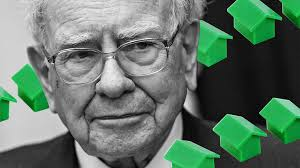

The client chosen for this project is Mr. Warren Buffett.

And his top 10 stocks are as follows:

1. Apple (AAPL)
2. Bank of America (BAC)
3. American Express (AXP)
4. Chevron (CVX)
5. Coca-Cola (KO)
6. Occidental Petroleum (OXY)
7. Kraft Heinz (KHC)
8. Davita (DVA)
9. Chubb (CB)
10. Moody's (MCO)

## Investment Strategy

Warren Buffett, often regarded as one of the most successful investors of all time, follows a distinct investment strategy that focuses on long-term value investing. Here are the key elements of his approach:

1. Value Investing:
   - Intrinsic Value: Buffett looks for companies that are undervalued compared to their intrinsic value. He calculates intrinsic value based on the company’s future cash flows and earnings potential.
   - Margin of Safety: He seeks a significant margin of safety to minimize risk, meaning the stock’s market price should be well below its intrinsic value.

2. Quality Businesses:
   - Competitive Advantage: Buffett invests in companies with a durable competitive advantage or "moat," which can protect them from competitors. This can be due to brand strength, unique products, or cost advantages.
   - Strong Management: He places a high value on strong, honest, and competent management teams. Buffett prefers businesses run by leaders who have a proven track record of integrity and performance.

3. Long-Term Perspective:
   - Patience: Buffett is known for his long-term investment horizon. He holds onto stocks for years or even decades, allowing compounding to work its magic.
   - Ignore Market Noise: He advises investors to focus on the fundamentals of the business rather than short-term market fluctuations or trends.

4. Focus on Fundamentals:
   - Financial Health: Buffett emphasizes the importance of a company’s financial strength, looking for strong balance sheets, consistent earnings growth, and efficient use of capital.
   - Cash Flow: He pays close attention to a company’s ability to generate cash flow, as it indicates financial health and the potential for reinvestment or dividends.

5. Simplicity and Understanding:
   - Circle of Competence: Buffett invests only in businesses he understands well, sticking to industries and sectors within his circle of competence.
   - Avoid Complexity: He avoids complex businesses that are difficult to understand or analyze.

6. Economic and Market Conditions:
   - Macroeconomic Awareness: While focused on individual businesses, Buffett is also mindful of broader economic and market conditions that could impact his investments.


By adhering to these principles, Buffett has achieved remarkable success with his investment firm, Berkshire Hathaway. His strategy emphasizes the importance of patience, discipline, and a keen focus on the intrinsic value of businesses.

# Starter Code

In [ ]:
%matplotlib inline
from pylab import *

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not shutil.which("ipopt"):
    # here is the IPOPT zip file
    !gdown 10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
    !unzip -o -q ipopt-linux64_dw
    assert(shutil.which("ipopt") or os.path.isfile("ipopt"))

from pyomo.environ import *

SOLVER = 'ipopt'
EXECUTABLE = '/content/ipopt'
ipopt_executable = '/content/ipopt'

Downloading...
From: https://drive.google.com/uc?id=10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
To: /content/ipopt-linux64_dw.zip
100% 1.82M/1.82M [00:00<00:00, 61.4MB/s]


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import minimize
from pyomo.opt import SolverStatus, TerminationCondition


# Create an empty DataFrame
df = pd.DataFrame()

def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']  # Select only the 'Adj Close' column

def main():
    # List of stock tickers
    stocks = ['AAPL', 'BAC', 'AXP', 'CVX', 'KO', 'OXY', 'KHC', 'DVA', 'CB', 'MCO']

    # Date range
    start_date = '2019-01-01'
    end_date = '2024-01-01'

    # Fetch data for each stock and add to the DataFrame
    for stock in stocks:
        df[stock] = fetch_stock_data(stock, start_date, end_date)

    # Display the DataFrame
    print(df)

# Run the main function if this script is executed
if __name__ == "__main__":
    main()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                  AAPL        BAC         AXP         CVX         KO  \
Date                                                                   
2019-01-02   37.793781  21.812506   88.261597   86.997520  39.522125   
2019-01-03   34.029240  21.462946   86.538795   85.331291  39.277897   
2019-01-04   35.481926  22.354328   90.438271   87.099686  40.061096   
2019-01-07   35.402943  22.336843   90.929192   88.231483  39.538963   
2019-01-08   36.077839  22.293148   91.373772   87.846367  39.985310   
...                ...        ...         ...         ...        ...   
2023-12-22  193.091385  32.995472  183.853470  147.925827  57.411739   
2023-12-26  192.542831  33.419888  184.239868  149.257706  57.648003   
2023-12-27  192.642548  33.400143  185.329666  148.768051  57.795662   
2023-12-28  193.071426  33.439625  186.062836  146.672318  57.835045   
2023-12-29  192.024185  33.232353  185.607086  146.074921  58.012238   

                  OXY        KHC         DVA          CB       

In [ ]:
df.head(10)

AAPL        BAC        AXP        CVX         KO        OXY  \
Date                                                                           
2019-01-02  37.793781  21.812506  88.261597  86.997520  39.522125  54.617714   
2019-01-03  34.029240  21.462946  86.538795  85.331291  39.277897  53.948196   
2019-01-04  35.481926  22.354328  90.438271  87.099686  40.061096  55.683640   
2019-01-07  35.402943  22.336843  90.929192  88.231483  39.538963  56.802422   
2019-01-08  36.077839  22.293148  91.373772  87.846367  39.985310  57.251694   
2019-01-09  36.690506  22.511627  91.540497  89.025276  39.218948  57.947636   
2019-01-10  36.807770  22.485409  91.012566  89.166763  39.640030  58.308815   
2019-01-11  36.446400  22.747576  91.281166  88.451538  39.867413  58.335243   
2019-01-14  35.898346  23.044701  91.179276  87.807053  39.707401  57.771454   
2019-01-15  36.633064  23.202003  90.762459  88.121460  40.061096  57.718594   

                  KHC        DVA          CB         MCO  
Date                                                      
2019-01-02  33.497307  51.730000  114.842293  134.117981  
2019-01-03  33.474133  50.980000  112.478516  129.671173  
2019-01-04  34.386135  54.000000  115.843765  136.431824  
2019-01-07  35.035378  54.369999  114.905464  136.936523  
2019-01-08  35.066284  54.060001  114.021301  138.926590  
2019-01-09  34.880791  53.919998  115.446793  139.393204  
2019-01-10  35.244049  55.160000  116.863266  141.916534  
2019-01-11  35.251785  56.070000  116.854233  141.849854  
2019-01-14  35.746437  55.959999  118.045135  142.087936  
2019-01-15  36.256546  56.770000  119.497711  145.906265

In [ ]:
df.shape

(1258, 10)

In [ ]:
df.isnull().sum()

AAPL    0
BAC     0
AXP     0
CVX     0
KO      0
OXY     0
KHC     0
DVA     0
CB      0
MCO     0
dtype: int64

In [ ]:
df.dtypes

AAPL    float64
BAC     float64
AXP     float64
CVX     float64
KO      float64
OXY     float64
KHC     float64
DVA     float64
CB      float64
MCO     float64
dtype: object

# EDA

## Histograms

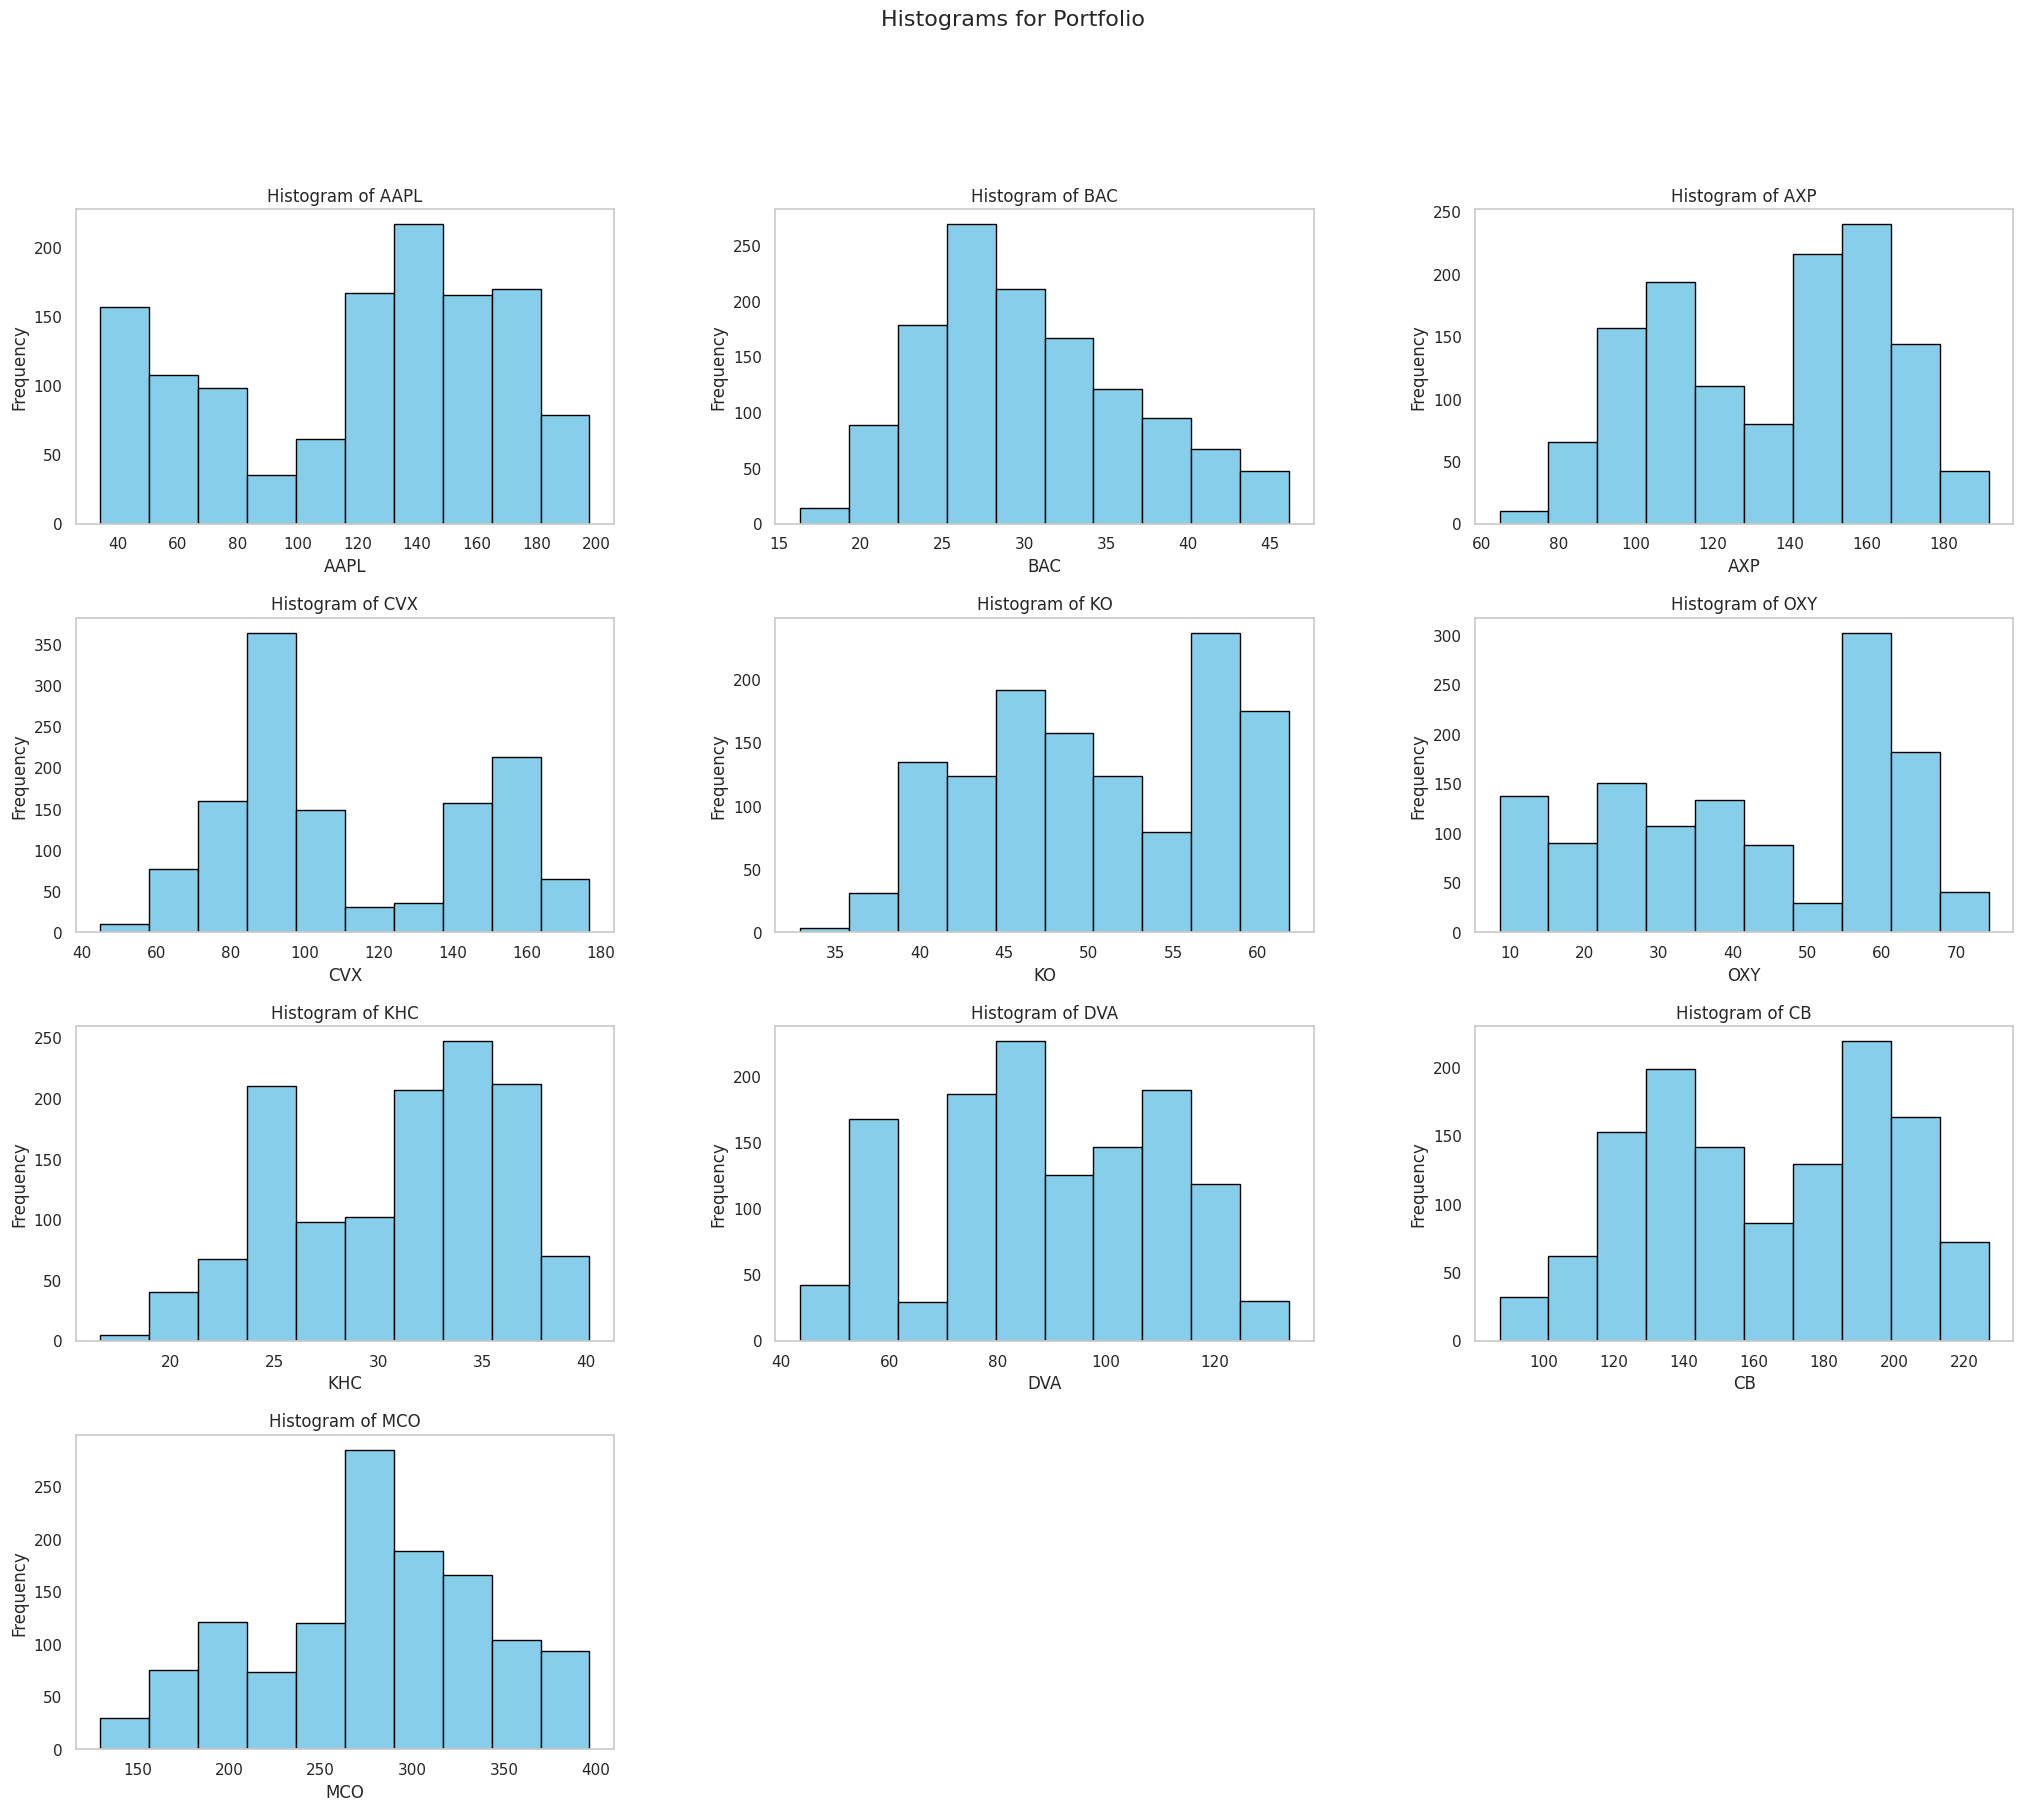

In [ ]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Create histograms
df.hist(bins=10, figsize=(25, 20), color='skyblue', edgecolor='black', grid=False)

# Add labels and title
for ax in plt.gcf().axes:
    ax.set_xlabel(ax.get_title())
    ax.set_ylabel('Frequency')
    ax.set_title('Histogram of ' + ax.get_title())

# Add overall title
plt.suptitle('Histograms for Portfolio', fontsize=16)

# Show the plot
plt.show()

### Analysis of Histograms

- Some stocks like AXP, CVX, and DVA show wide ranges in their histograms, indicating higher volatility. Others, like KO and BAC, have narrower ranges, suggesting more stable prices.
- Several stocks show multimodal distributions, indicating that the stock prices have had multiple levels where they frequently cluster.

## Boxplots

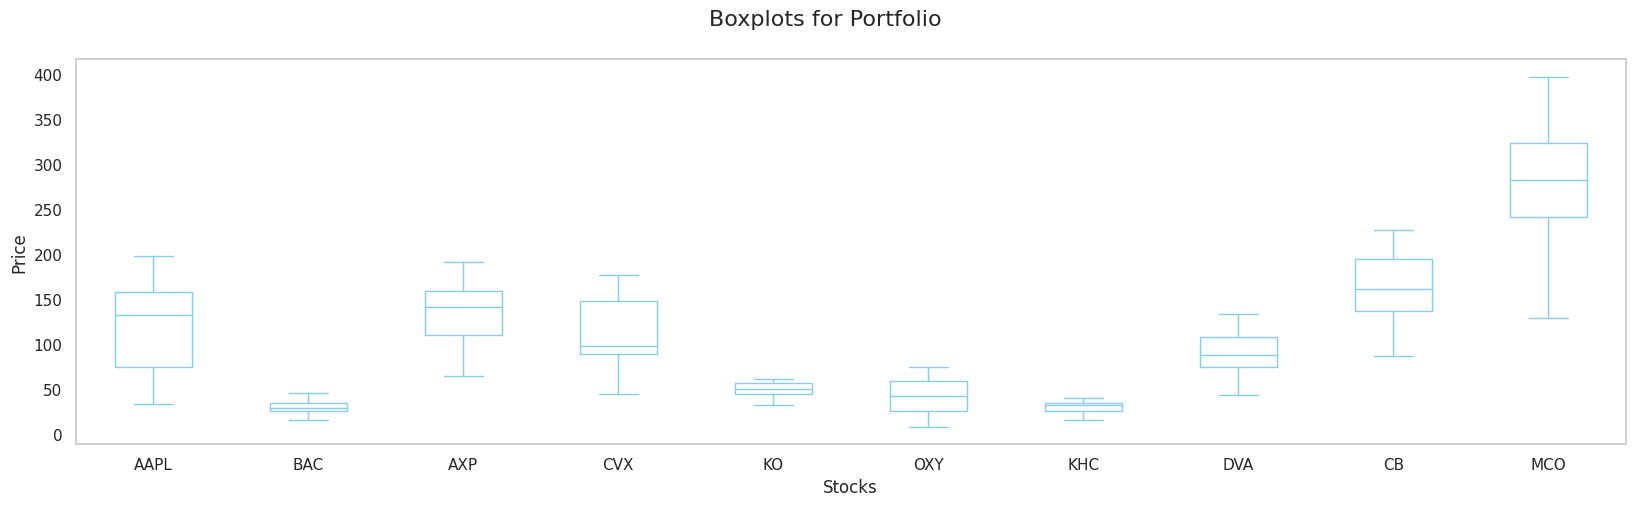

In [ ]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Create histograms
df.boxplot(figsize=(20, 5), color='skyblue', grid=False)

# Add labels and title
for ax in plt.gcf().axes:
    ax.set_xlabel(ax.get_title())

# Add overall title
plt.suptitle('Boxplots for Portfolio', fontsize=16)
ax.set_xlabel('Stocks')
ax.set_ylabel('Price')

# Show the plot
plt.show()

### Analysis of Boxplots

No outliers present in any of the stock data.

## Stock Price over the Years

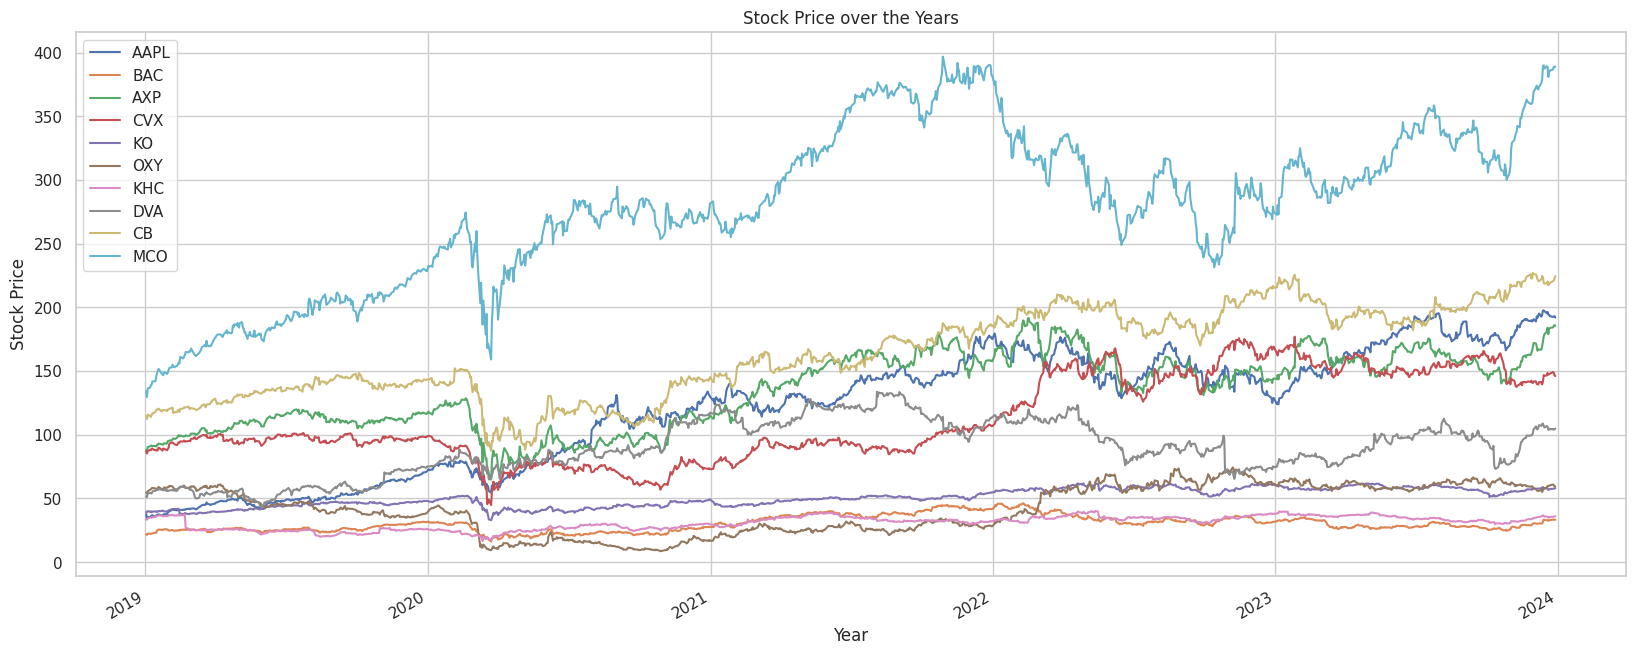

In [ ]:
ax = df.plot(figsize=(20, 8))
ax.set_title('Stock Price over the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Stock Price')
plt.show()

### Analysis of Stock Price over the Years

1. AAPL (Apple Inc.)
   - Trend: Strong upward trend, with a dip around early 2020 and a rise afterwards.
   - Events: The dip in early 2020 correlates with the COVID-19 pandemic's onset, which initially impacted stock markets globally. The subsequent rise aligns with increased demand for technology products as people worked and studied from home.

2. BAC (Bank of America):
   - Trend: Moderate fluctuations with a dip in early 2020 and a gradual recovery.
   - Events: The early 2020 dip reflects the pandemic's impact on the financial sector, including concerns about loan defaults and lower interest rates.

3. AXP (American Express):
   - Trend: Similar to BAC, with a notable dip in early 2020 and recovery over time.
   - Events: The initial drop was due to reduced consumer spending and travel restrictions during the pandemic, affecting credit card companies.

4. CVX (Chevron Corporation):
   - Trend: Fluctuations with a significant drop in early 2020, followed by recovery.
   - Events: The early 2020 decline corresponds to the pandemic's impact on oil demand and prices. Recovery aligns with the rebound in oil prices as economies reopened.

5. KO (Coca-Cola Company):
   - Trend: Relatively stable with minor fluctuations, dip in early 2020, and gradual recovery.
   - Events: The dip aligns with reduced sales in restaurants and events during lockdowns, while the recovery corresponds to the reopening of the economy.

6. OXY (Occidental Petroleum):
   - Trend: Significant drop in early 2020, with a slower recovery.
   - Events: The steep decline is linked to the oil price crash during the pandemic. Recovery has been slower due to volatility in oil prices.

7. KHC (Kraft Heinz Company):
   - **Trend:** Minor fluctuations with slight upward movement.
   - **Events:** Stability suggests consistent demand for consumer staples even during economic downturns.

8. DVA (DaVita Inc.):
   - **Trend:** Relatively stable with minor fluctuations.
   - **Events:** Healthcare companies like DaVita may have experienced steady demand as they provide essential services.

9. CB (Chubb Limited):
   - Trend: Fluctuations with a dip in early 2020 and recovery.
   - Events: Similar to BAC, the initial dip reflects pandemic-related financial uncertainties, with recovery as markets stabilized.

10. MCO (Moody's Corporation):
    - Trend: Strong upward trend with some fluctuations, particularly a dip in early 2020.
    - Events: The initial dip correlates with market uncertainty during the pandemic, followed by recovery and growth as economic conditions improved.


Key Real-World Events Influencing Trends:

- COVID-19 Pandemic (Early 2020): Caused initial market panic, affecting sectors differently.
- Oil Price Crash (Early 2020): Severely impacted energy companies like CVX and OXY.
- Economic Stimulus and Recovery (2020-2021): Government interventions and vaccine rollouts supported economic recovery.
- Technological Demand Increase: Boosted companies like AAPL as remote work and digital services surged.
- Inflation and Interest Rate Changes (2022-2023): Affected financial companies like BAC and AXP.

## Daily Returns of Each Stock over the Years

In [ ]:
# Calculate daily returns
returns_df = df.pct_change().dropna()  # Drop the first row with NaN values

# Display the DataFrame with returns
returns_df.head(5)

AAPL       BAC       AXP       CVX        KO       OXY  \
Date                                                                     
2019-01-03 -0.099607 -0.016026 -0.019519 -0.019153 -0.006180 -0.012258   
2019-01-04  0.042689  0.041531  0.045060  0.020724  0.019940  0.032169   
2019-01-07 -0.002226 -0.000782  0.005428  0.012994 -0.013033  0.020092   
2019-01-08  0.019063 -0.001956  0.004889 -0.004365  0.011289  0.007909   
2019-01-09  0.016982  0.009800  0.001825  0.013420 -0.019166  0.012156   

                 KHC       DVA        CB       MCO  
Date                                                
2019-01-03 -0.000692 -0.014498 -0.020583 -0.033156  
2019-01-04  0.027245  0.059239  0.029919  0.052137  
2019-01-07  0.018881  0.006852 -0.008100  0.003699  
2019-01-08  0.000882 -0.005702 -0.007695  0.014533  
2019-01-09 -0.005290 -0.002590  0.012502  0.003359

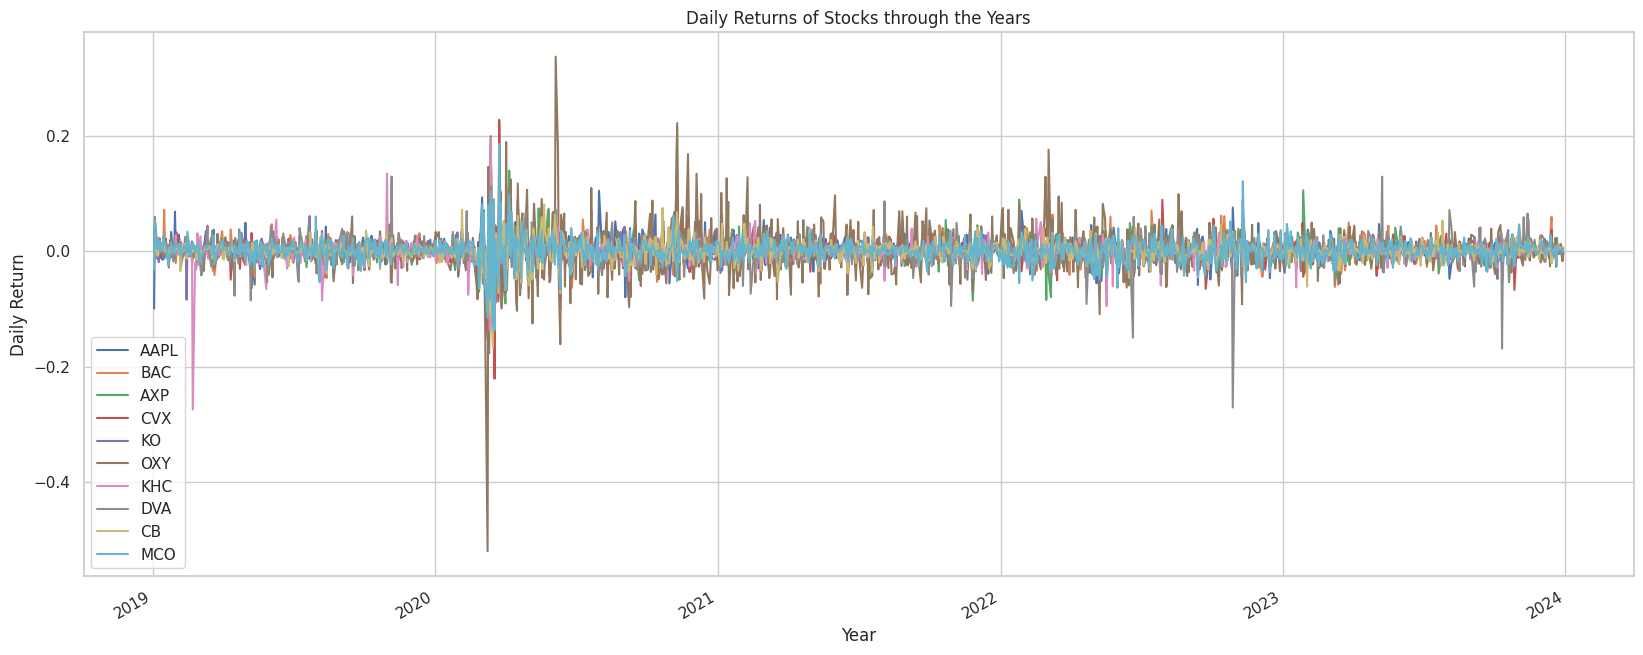

In [ ]:
ax = returns_df.plot(figsize=(20, 8))
ax.set_title('Daily Returns of Stocks through the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Daily Return')
plt.show()

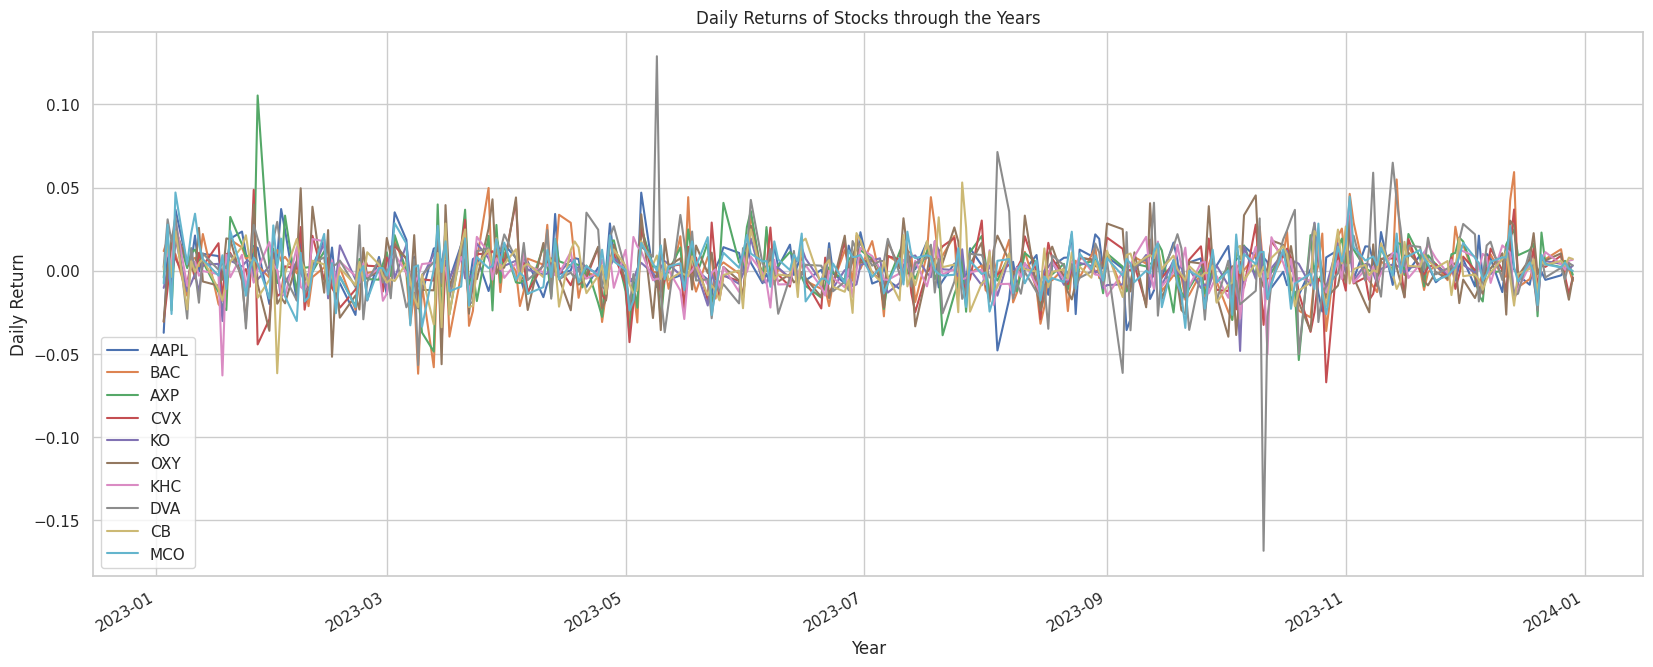

In [ ]:
ax = returns_df.loc['2023':].plot(figsize=(20, 8))
ax.set_title('Daily Returns of Stocks through the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Daily Return')
plt.show()

### Analysis of Daily Returns of Each Stock over the Years

1. Volatility Spike in Early 2020:
- Observation: There's a noticeable spike in volatility for all stocks around early 2020.
- Reason: This corresponds with the onset of the COVID-19 pandemic, which led to significant market uncertainty and rapid price changes as investors reacted to global lockdowns, economic shutdowns, and other disruptions.

2. Subsequent Volatility Fluctuations:
- Observation: After the initial spike, volatility remains elevated but becomes more sporadic, with occasional large swings in returns.
- Reason: These fluctuations can be attributed to periodic news about the pandemic, fiscal stimulus measures, vaccine rollouts, and changing economic conditions.

3. Stabilization and Lower Volatility Post-2021:
- Observation: From 2021 onwards, volatility appears to decrease, though there are still periods of heightened activity.
- Reason: As markets adapted to the new normal and economic recovery took hold, investor sentiment stabilized. Volatility spikes during this period may be due to specific events such as monetary policy changes or geopolitical tensions.

4. Sector-Specific Volatility:
- Energy Stocks (e.g., CVX, OXY): Tend to show higher volatility due to fluctuating oil prices and geopolitical factors affecting supply and demand.
- Technology Stocks (e.g., AAPL): Experience volatility linked to technological advancements, regulatory changes, and shifts in consumer demand.

5. Individual Stock Volatility:
- Observation: Some stocks exhibit larger swings than others, indicating differing levels of risk or investor sentiment. For example, OXY shows larger fluctuations, which may reflect its sensitivity to oil price changes and industry-specific factors.

## Daily Returns of Each Stock Individually Plotted

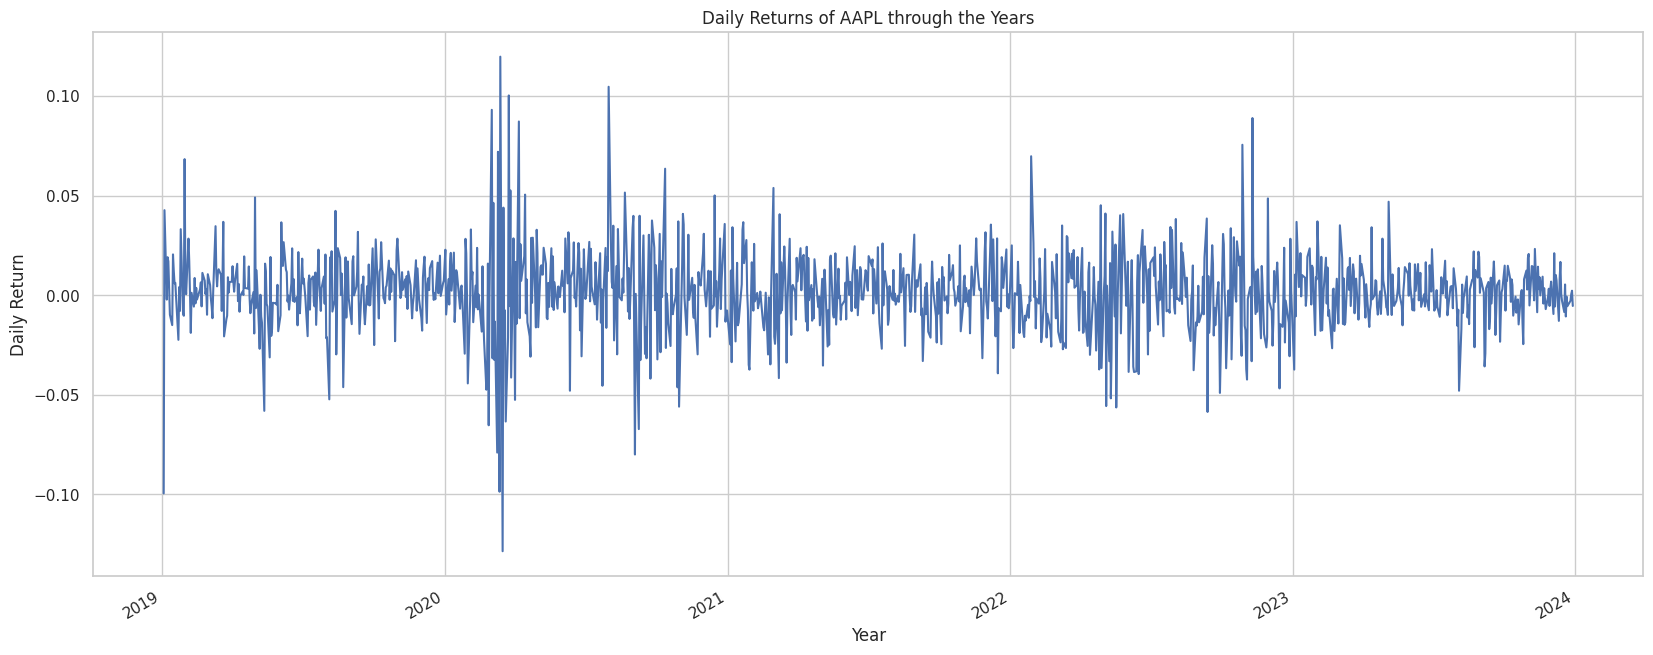

In [ ]:
ax = returns_df['AAPL'].plot(figsize=(20, 8))
ax.set_title('Daily Returns of AAPL through the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Daily Return')
plt.show()

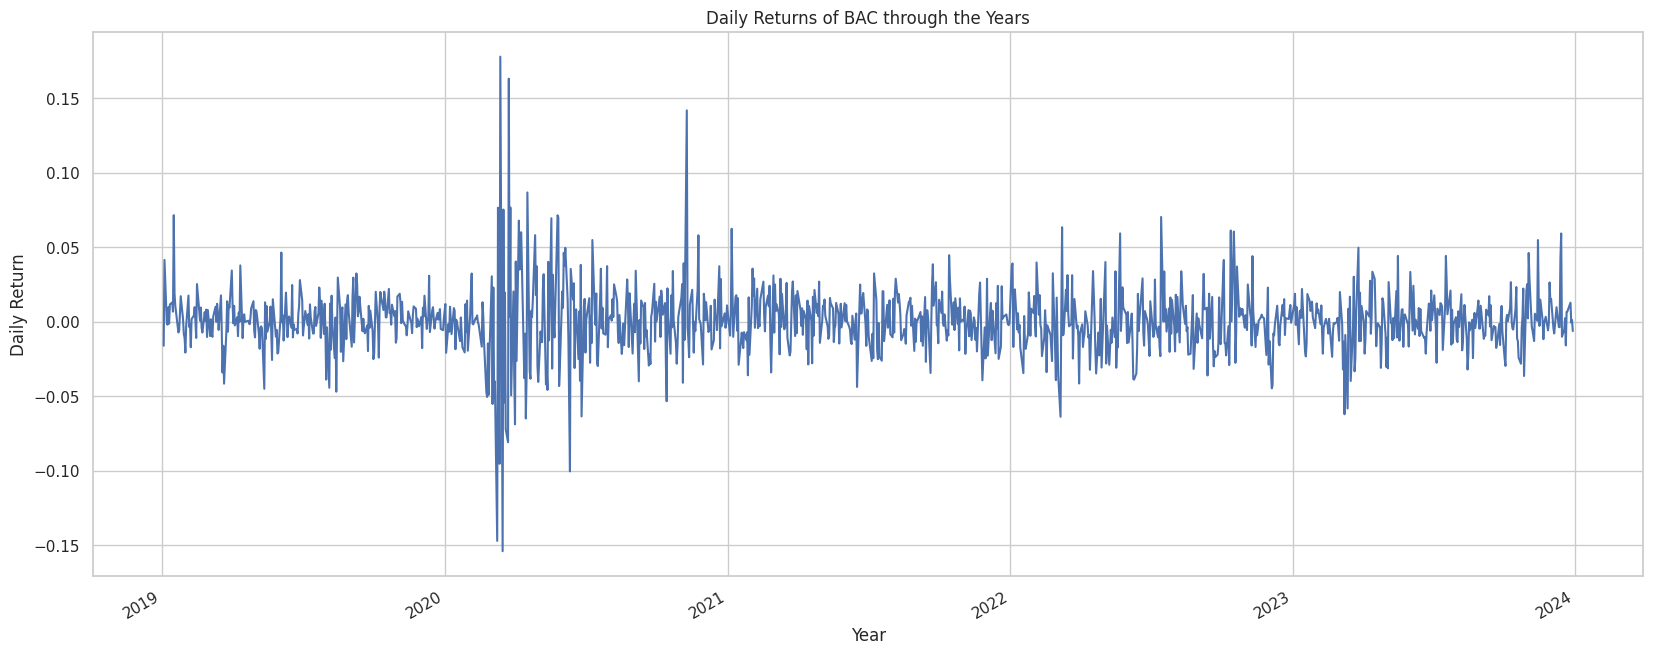

In [ ]:
ax = returns_df['BAC'].plot(figsize=(20, 8))
ax.set_title('Daily Returns of BAC through the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Daily Return')
plt.show()

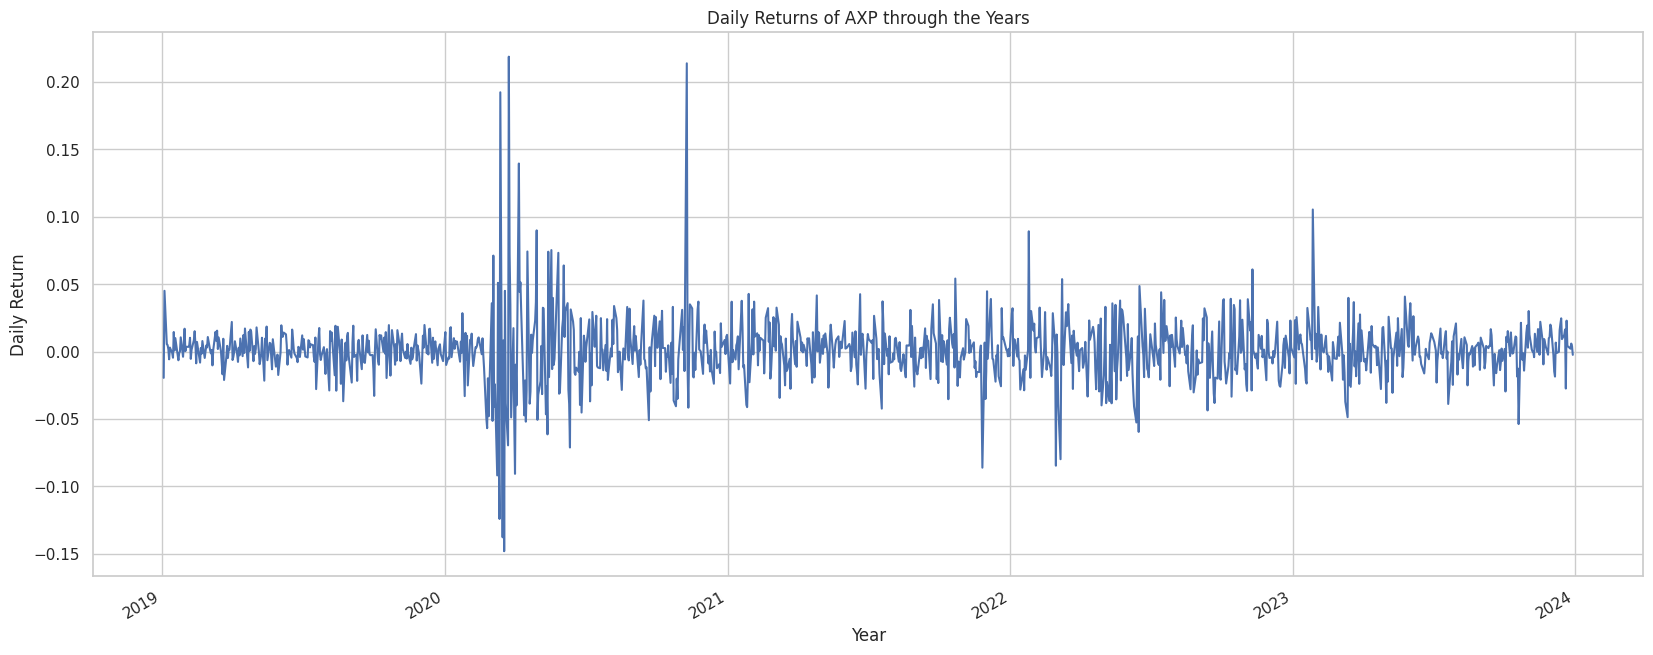

In [ ]:
ax = returns_df['AXP'].plot(figsize=(20, 8))
ax.set_title('Daily Returns of AXP through the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Daily Return')
plt.show()

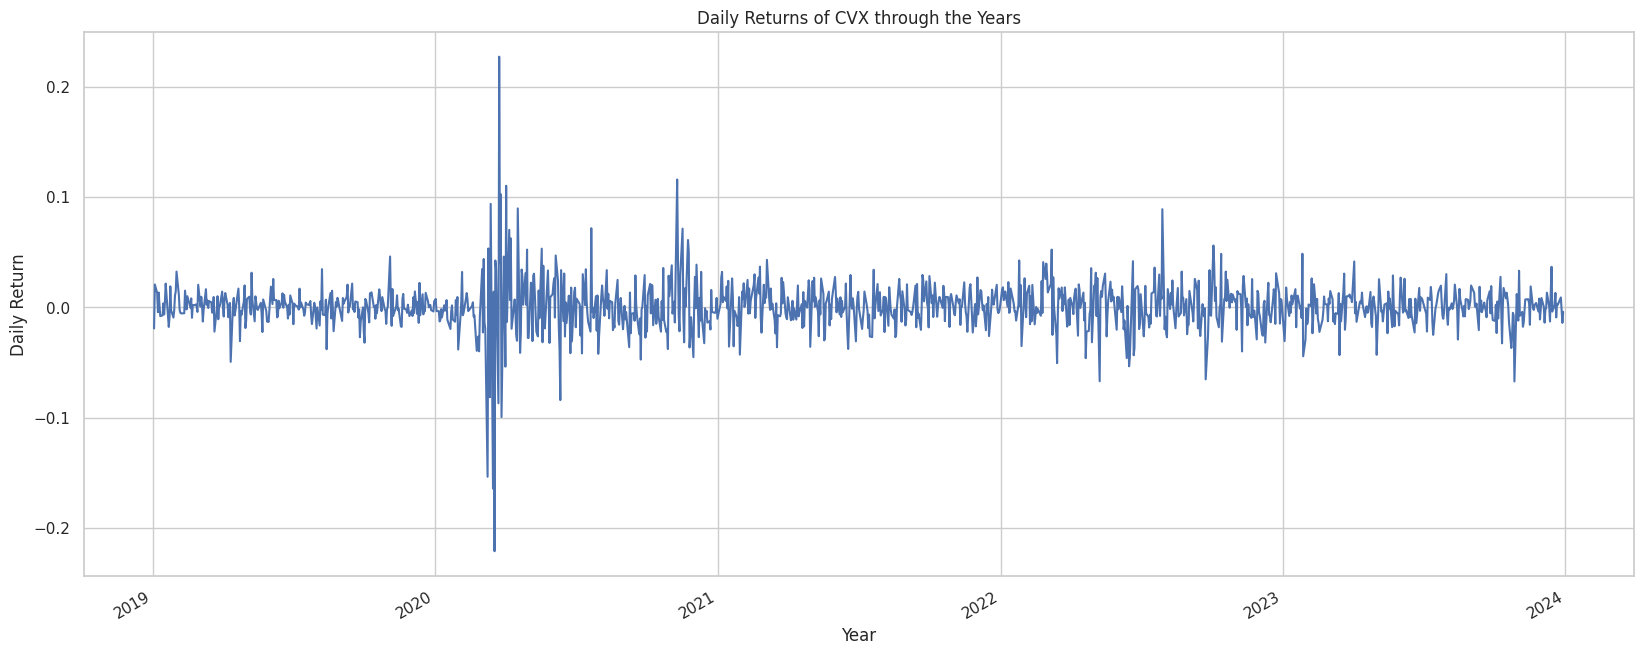

In [ ]:
ax = returns_df['CVX'].plot(figsize=(20, 8))
ax.set_title('Daily Returns of CVX through the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Daily Return')
plt.show()

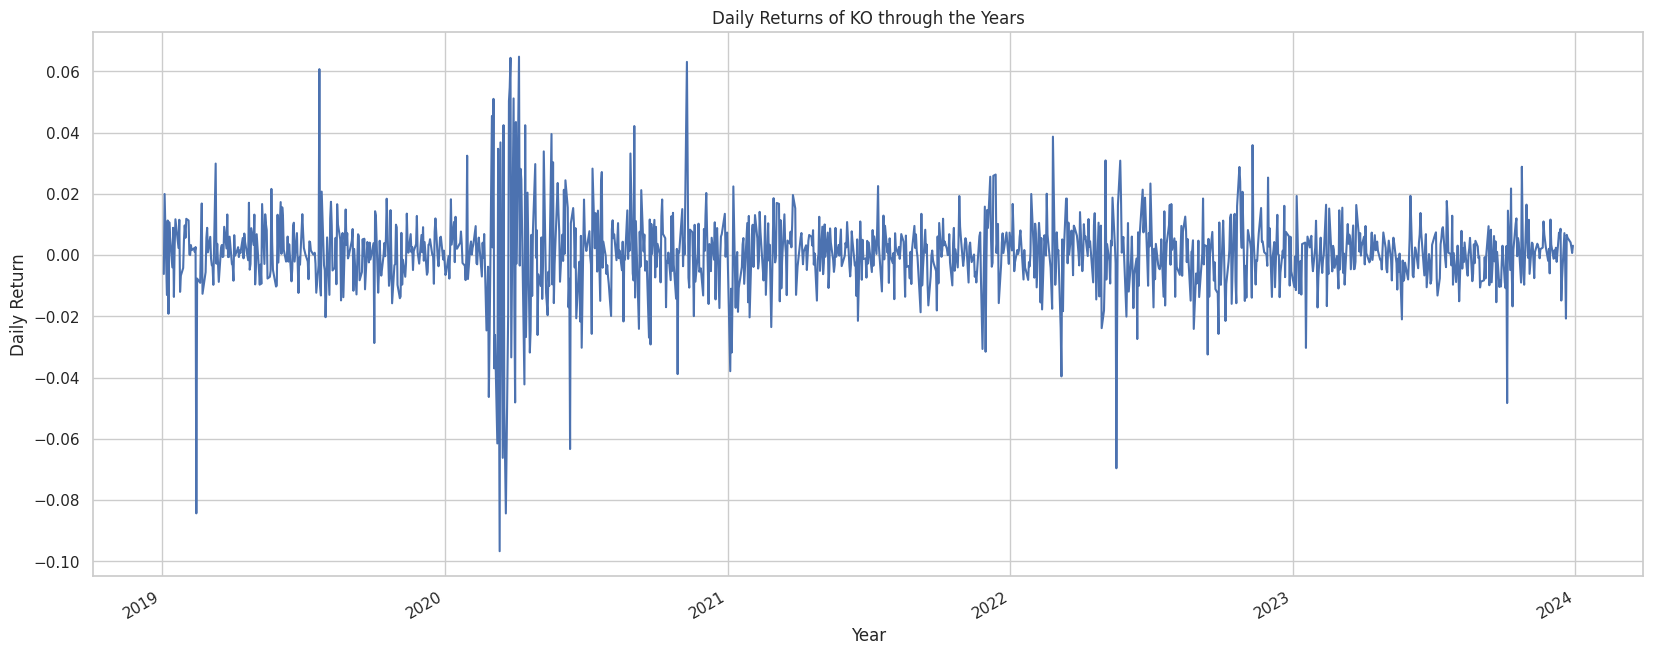

In [ ]:
ax = returns_df['KO'].plot(figsize=(20, 8))
ax.set_title('Daily Returns of KO through the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Daily Return')
plt.show()

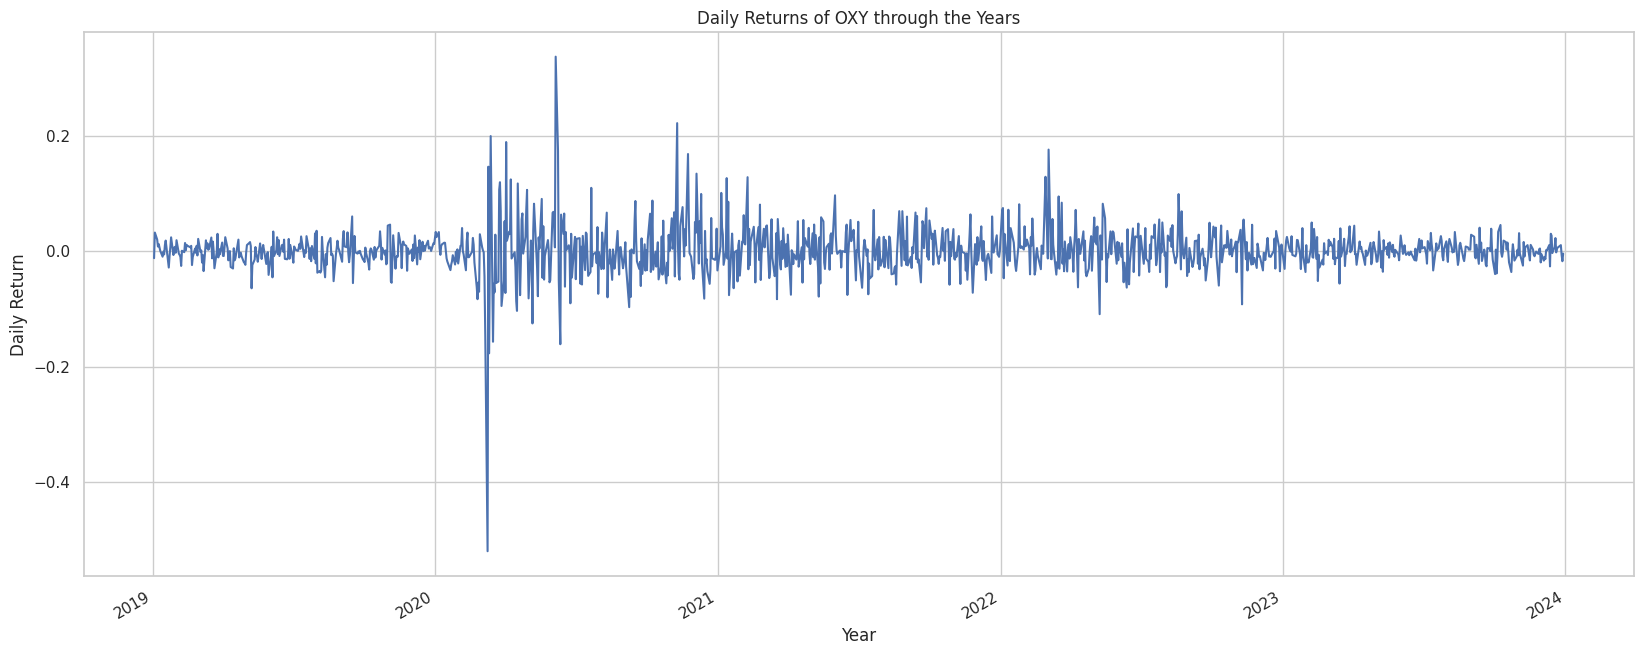

In [ ]:
ax = returns_df['OXY'].plot(figsize=(20, 8))
ax.set_title('Daily Returns of OXY through the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Daily Return')
plt.show()

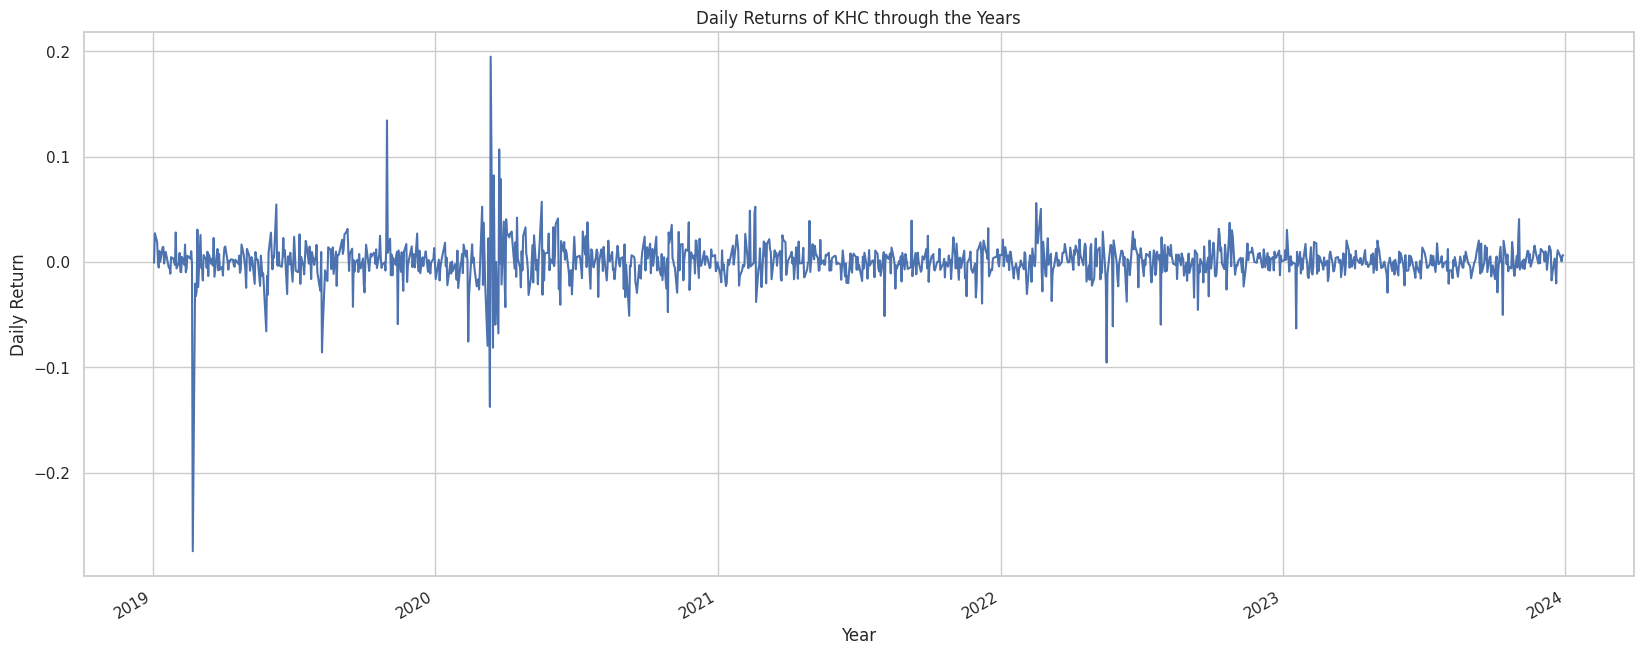

In [ ]:
ax = returns_df['KHC'].plot(figsize=(20, 8))
ax.set_title('Daily Returns of KHC through the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Daily Return')
plt.show()

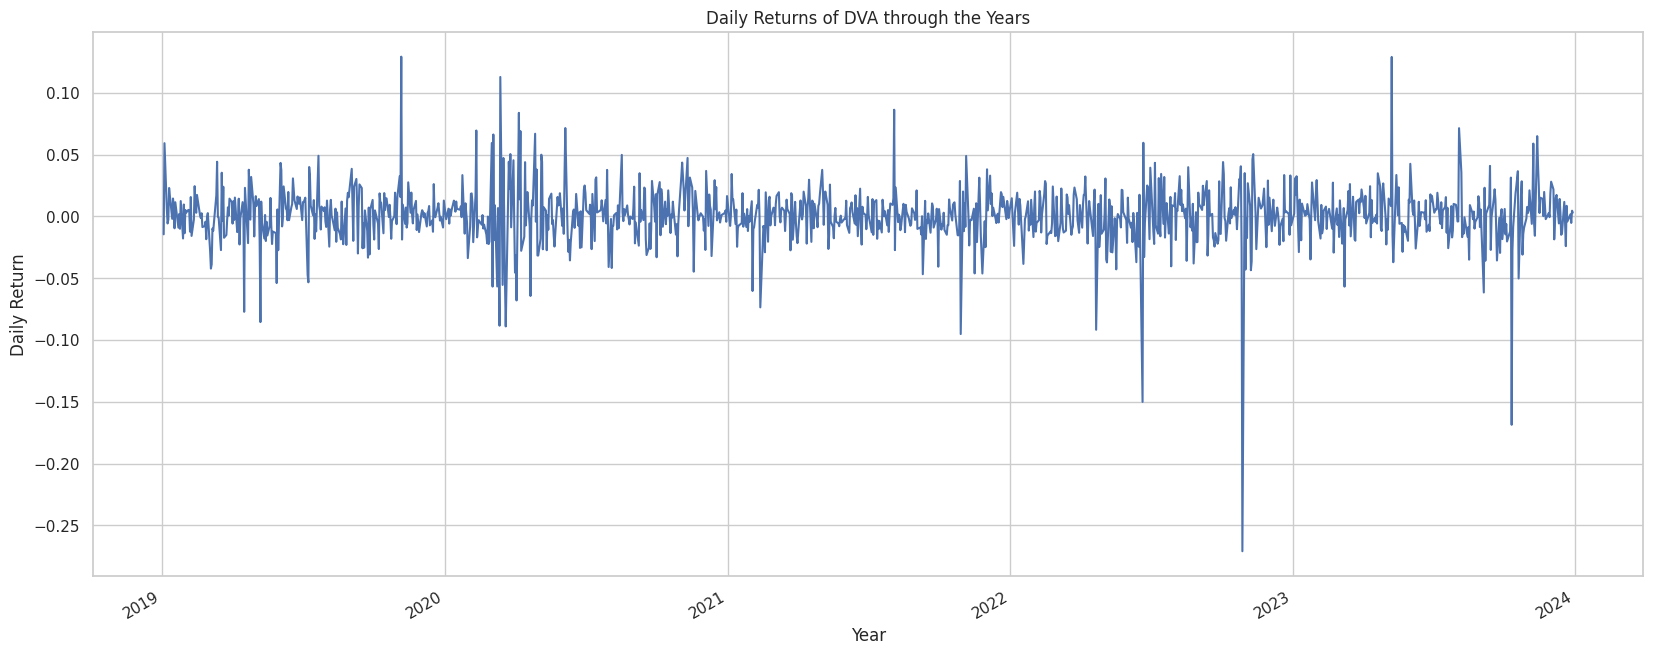

In [ ]:
ax = returns_df['DVA'].plot(figsize=(20, 8))
ax.set_title('Daily Returns of DVA through the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Daily Return')
plt.show()

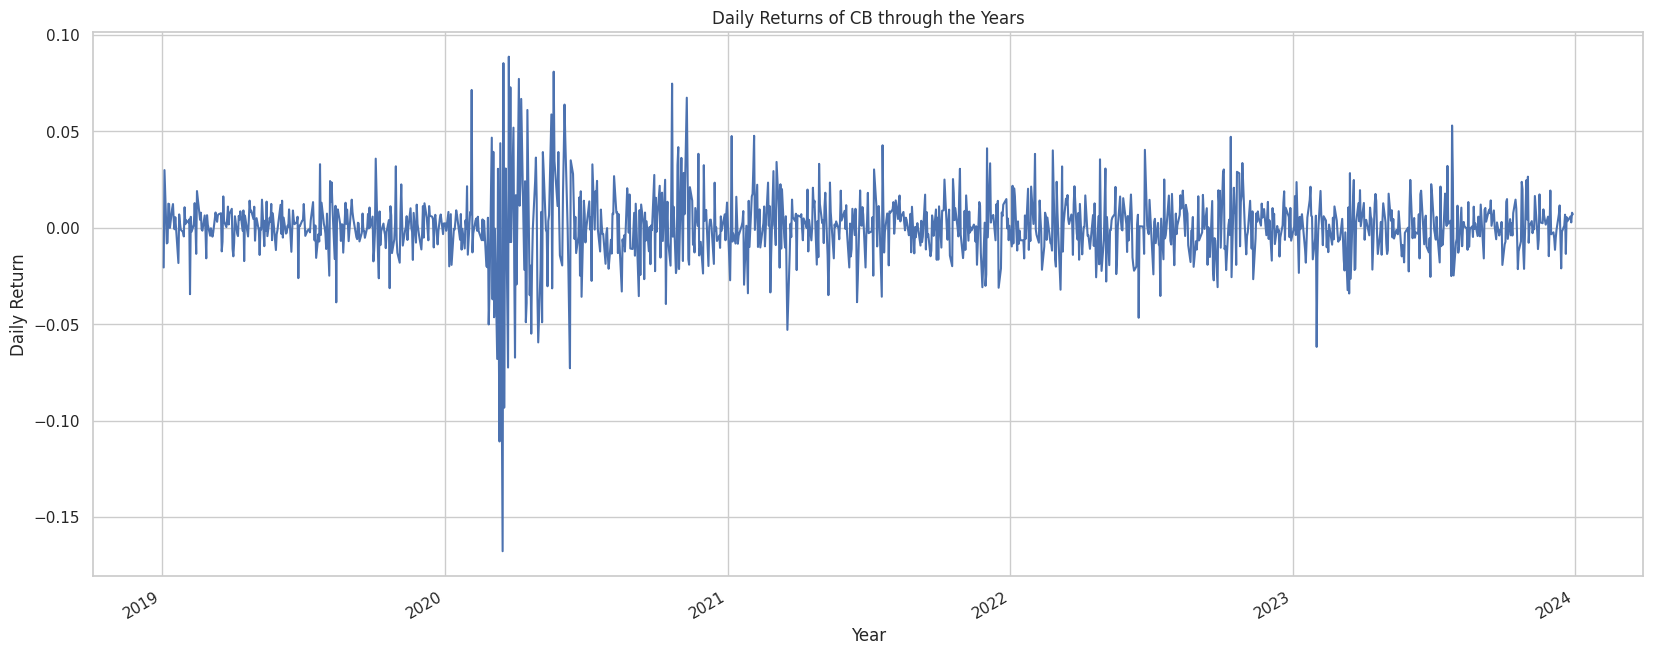

In [ ]:
ax = returns_df['CB'].plot(figsize=(20, 8))
ax.set_title('Daily Returns of CB through the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Daily Return')
plt.show()

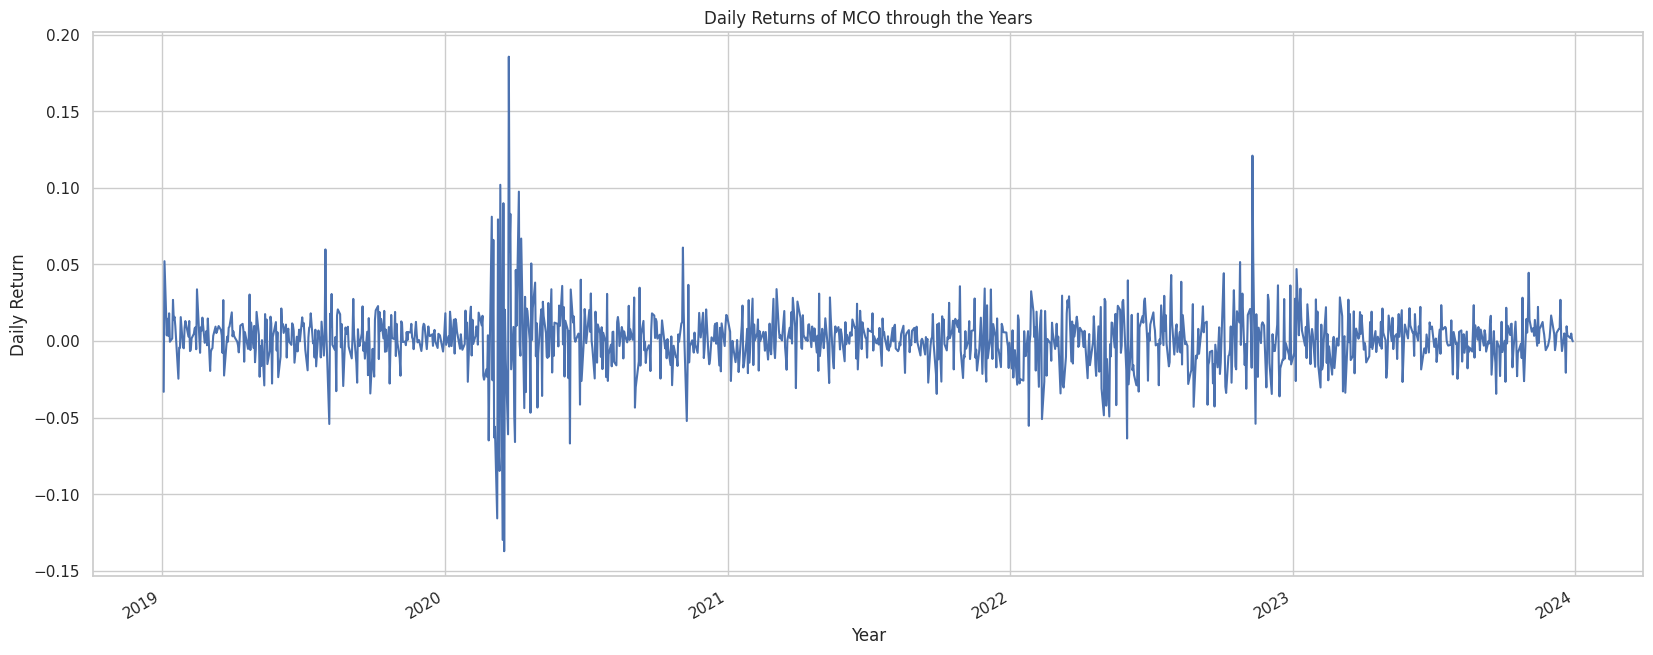

In [ ]:
ax = returns_df['MCO'].plot(figsize=(20, 8))
ax.set_title('Daily Returns of MCO through the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Daily Return')
plt.show()

In [ ]:
Avg_Return = pd.DataFrame(returns_df.mean() ,columns=["Avg_Return"])
print(Avg_Return)

      Avg_Return
AAPL    0.001500
BAC     0.000588
AXP     0.000870
CVX     0.000664
KO      0.000397
OXY     0.000907
KHC     0.000258
DVA     0.000838
CB      0.000697
MCO     0.001048


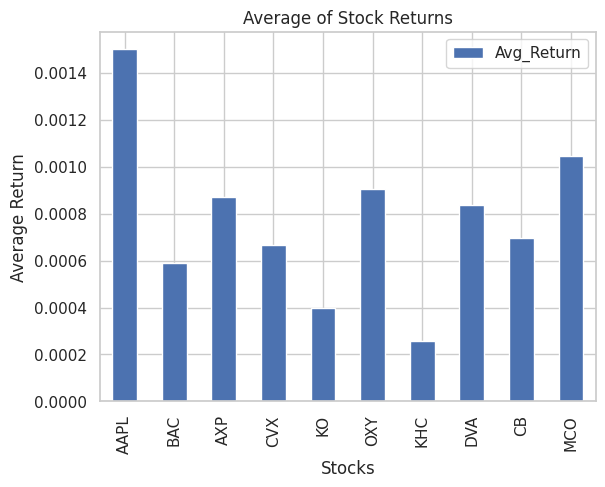

In [ ]:
Avg_Return.plot(kind='bar', title='Average of Stock Returns', ylabel='Average Return', xlabel='Stocks')
plt.show()

#Multivariate Analysis

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                  AAPL        BAC         AXP         CVX         KO  \
Date                                                                   
2019-01-02   37.793781  21.812506   88.261597   86.997520  39.522125   
2019-01-03   34.029240  21.462946   86.538795   85.331291  39.277897   
2019-01-04   35.481926  22.354328   90.438271   87.099686  40.061096   
2019-01-07   35.402943  22.336843   90.929192   88.231483  39.538963   
2019-01-08   36.077839  22.293148   91.373772   87.846367  39.985310   
...                ...        ...         ...         ...        ...   
2023-12-22  193.091385  32.995472  183.853470  147.925827  57.411739   
2023-12-26  192.542831  33.419888  184.239868  149.257706  57.648003   
2023-12-27  192.642548  33.400143  185.329666  148.768051  57.795662   
2023-12-28  193.071426  33.439625  186.062836  146.672318  57.835045   
2023-12-29  192.024185  33.232353  185.607086  146.074921  58.012238   

                  OXY        KHC         DVA          CB       

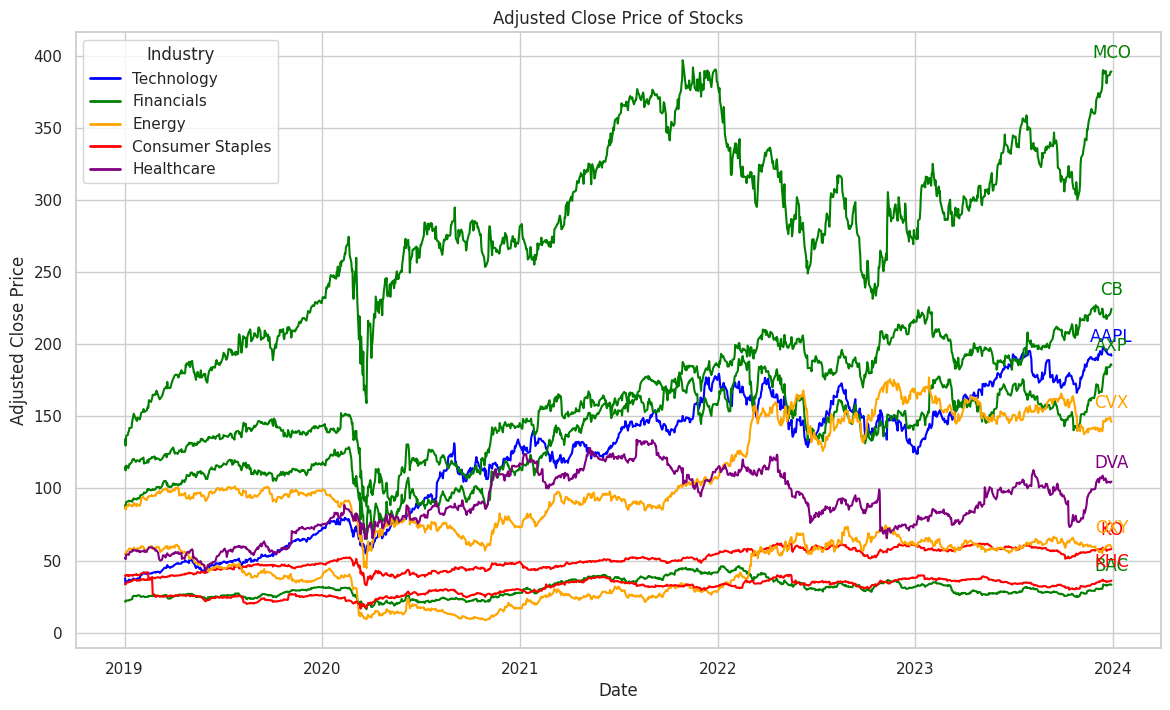

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Define industry mappings for each stock
industry_mapping = {
    'AAPL': 'Technology',
    'BAC': 'Financials',
    'AXP': 'Financials',
    'CVX': 'Energy',
    'KO': 'Consumer Staples',
    'OXY': 'Energy',
    'KHC': 'Consumer Staples',
    'DVA': 'Healthcare',
    'CB': 'Financials',
    'MCO': 'Financials'
}

# Define colors for each industry
industry_colors = {
    'Technology': 'blue',
    'Financials': 'green',
    'Energy': 'orange',
    'Consumer Staples': 'red',
    'Healthcare': 'purple'
}

# Create an empty DataFrame
df = pd.DataFrame()

def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']  # Select only the 'Adj Close' column

def main():
    # List of stock tickers
    stocks = ['AAPL', 'BAC', 'AXP', 'CVX', 'KO', 'OXY', 'KHC', 'DVA', 'CB', 'MCO']

    # Date range
    start_date = '2019-01-01'
    end_date = '2024-01-01'

    # Fetch data for each stock and add to the DataFrame
    for stock in stocks:
        df[stock] = fetch_stock_data(stock, start_date, end_date)

    # Display the DataFrame
    print(df)

    # Plotting
    plt.figure(figsize=(14, 8))

    # Plot each stock with color based on industry and annotate with company name
    for stock in stocks:
        plt.plot(df.index, df[stock], label=stock, color=industry_colors[industry_mapping[stock]])
        # Annotate the last point of the line with the stock name
        plt.annotate(stock, (df.index[-1], df[stock].iloc[-1]),
                     textcoords="offset points", xytext=(0, 10), ha='center',
                     color=industry_colors[industry_mapping[stock]])

    # Add legend with unique colors for industries
    handles = [plt.Line2D([0], [0], color=color, lw=2) for color in industry_colors.values()]
    labels = industry_colors.keys()
    plt.legend(handles=handles, labels=labels, title='Industry')

    plt.title('Adjusted Close Price of Stocks')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.grid(True)
    plt.show()

# Run the main function if this script is executed
if __name__ == "__main__":
    main()

## Analysis of Multivariate

Overall Trends:

- The Financials industry (green lines) shows the most significant volatility and growth, especially around the 2020 period. This may reflect the market's reaction to the COVID-19 pandemic and subsequent recovery.

- Technology (blue line) has shown a steady increase, especially from 2020
onwards, though it appears to have plateaued or slightly decreased towards 2024.

- Energy (orange lines) exhibits notable volatility, with a sharp dip around 2020, likely corresponding to the pandemic-induced drop in oil prices. The recovery has been gradual but evident.

- Consumer Staples (red lines) and Healthcare (purple lines) have been more stable, with slower growth compared to other sectors.
Impact of External Events:

- The significant dip across most industries around early 2020 likely corresponds to the global market downturn due to the COVID-19 pandemic. The Financials and Energy sectors were particularly impacted.

- Post-2020, the recovery in Financials and Technology suggests a strong rebound, likely due to increased reliance on technology and the resilience of financial institutions.


Industry-Specific Performance:

- Financials: The green lines show the highest growth and volatility, indicating that stocks in this sector have experienced significant fluctuations, possibly due to economic uncertainties and interest rate changes.

- Technology: Consistent upward trend, highlighting the sector's robustness and growth potential, particularly with increased digital transformation.
Energy: Volatile, with a sharp dip and gradual recovery. This reflects the sector's sensitivity to global oil prices and geopolitical factors.

- Consumer Staples & Healthcare: These sectors show slower but steadier growth, suggesting they are more defensive in nature, providing stability during economic downturns.


Interpretation:

- Investor Sentiment: The sharp recovery in Technology and Financials suggests strong investor confidence in these sectors post-2020. Technology has likely benefited from the accelerated digitalization trends, while Financials have rebounded due to economic recovery and policy support.

- Risk and Volatility: The Energy sector's volatility underscores its exposure to external shocks, making it a higher-risk sector. Financials, while volatile, have shown strong recovery potential, making them attractive but risky investments.

- Defensive Sectors: Consumer Staples and Healthcare’s steady performance indicates that they are safer investments during economic downturns, though they offer lower returns compared to more volatile sectors.


Conclusion:
- This graph illustrates the divergent performances of different industries over time. Investors might interpret this as a signal to balance their portfolios by considering both high-growth, high-volatility sectors like Technology and Financials, and more stable, defensive sectors like Consumer Staples and Healthcare, depending on their risk tolerance and investment goals.

# Standard Deviation

In [ ]:
Std_Dev_Return = pd.DataFrame(np.std(returns_df) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

      Std_Dev_Return
AAPL        0.020298
BAC         0.022544
AXP         0.023795
CVX         0.022343
KO          0.013472
OXY         0.039859
KHC         0.019565
DVA         0.023172
CB          0.018018
MCO         0.020044


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


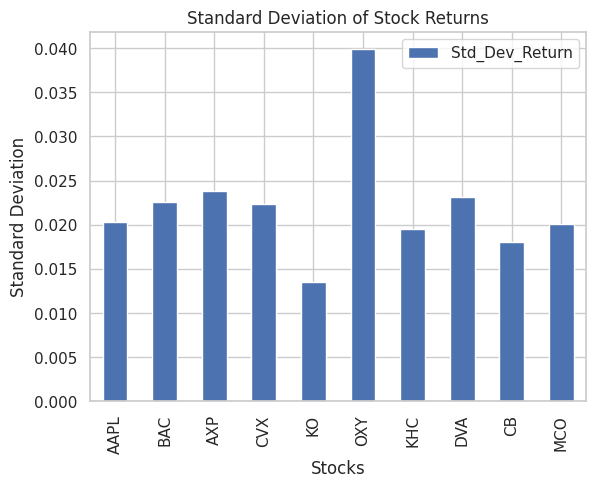

In [ ]:
Std_Dev_Return.plot(kind='bar', title='Standard Deviation of Stock Returns', ylabel='Standard Deviation', xlabel='Stocks')
plt.show()

##Interpretation of the Standard Deviation


A higher standard deviation indicates greater volatility, meaning the stock's returns fluctuate widely over time. This is often associated with higher risk.
A lower standard deviation suggests more stability, where the stock's returns are more consistent and closer to the average return.

------

Stocks with higher standard deviations (e.g., OXY (Occidental Petroleum)) are riskier, which means their prices experience more significant changes.

Stocks with lower standard deviations (e.g., KO (Coca-Cola)) are more stable, which might be preferable for conservative investors seeking steady returns.

In [ ]:
returns_df.head(5)

AAPL       BAC       AXP       CVX        KO       OXY  \
Date                                                                     
2019-01-03 -0.099607 -0.016026 -0.019519 -0.019153 -0.006180 -0.012258   
2019-01-04  0.042689  0.041531  0.045060  0.020724  0.019940  0.032169   
2019-01-07 -0.002226 -0.000782  0.005428  0.012994 -0.013033  0.020092   
2019-01-08  0.019063 -0.001956  0.004889 -0.004365  0.011289  0.007909   
2019-01-09  0.016982  0.009800  0.001825  0.013420 -0.019166  0.012156   

                 KHC       DVA        CB       MCO  
Date                                                
2019-01-03 -0.000692 -0.014498 -0.020583 -0.033156  
2019-01-04  0.027245  0.059239  0.029919  0.052137  
2019-01-07  0.018881  0.006852 -0.008100  0.003699  
2019-01-08  0.000882 -0.005702 -0.007695  0.014533  
2019-01-09 -0.005290 -0.002590  0.012502  0.003359

<ipython-input-85-da2d7634f19f>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (std_devs[i], avg_returns[i]),


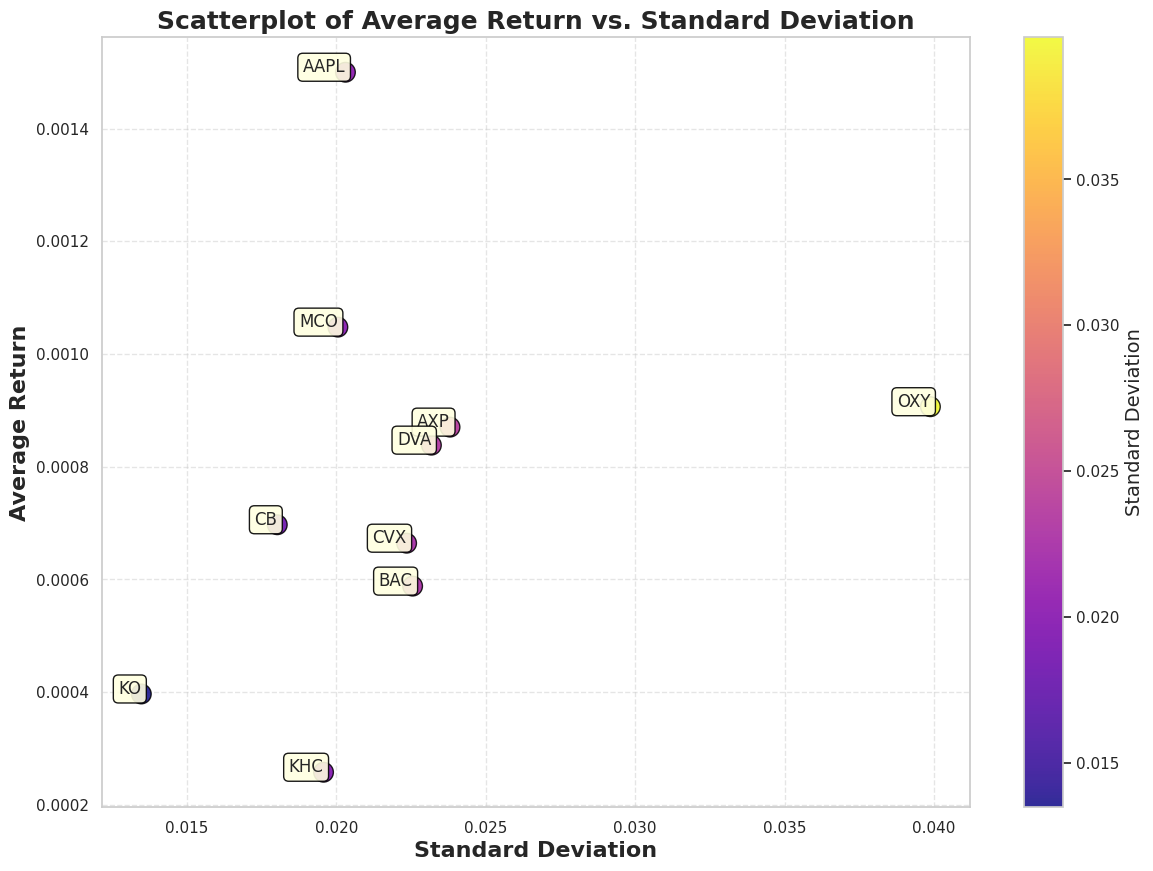

      Average Return  Standard Deviation
AAPL        0.001500            0.020306
BAC         0.000588            0.022553
AXP         0.000870            0.023804
CVX         0.000664            0.022352
KO          0.000397            0.013477
OXY         0.000907            0.039875
KHC         0.000258            0.019573
DVA         0.000838            0.023181
CB          0.000697            0.018025
MCO         0.001048            0.020052


Average Return  Standard Deviation
AAPL        0.001500            0.020306
BAC         0.000588            0.022553
AXP         0.000870            0.023804
CVX         0.000664            0.022352
KO          0.000397            0.013477
OXY         0.000907            0.039875
KHC         0.000258            0.019573
DVA         0.000838            0.023181
CB          0.000697            0.018025
MCO         0.001048            0.020052

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate average returns and standard deviations
avg_returns = returns_df.mean()
std_devs = returns_df.std()

# Create scatter plot with increased font sizes and bigger points with distinct colors
plt.figure(figsize=(14, 10))
sc = plt.scatter(std_devs, avg_returns, c=std_devs, cmap='plasma', s=200, alpha=0.85, edgecolor='black', linewidth=1)
plt.xlabel('Standard Deviation', fontsize=16, fontweight='bold')
plt.ylabel('Average Return', fontsize=16, fontweight='bold')
plt.title('Scatterplot of Average Return vs. Standard Deviation', fontsize=18, fontweight='bold')

# Add labels for each stock with a background box
for i, stock in enumerate(std_devs.index):
    plt.annotate(stock,
                 (std_devs[i], avg_returns[i]),
                 fontsize=12,
                 ha='right',
                 bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='lightyellow', alpha=0.9))

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Standard Deviation', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Create and display table with returns
returns_table = pd.DataFrame({
    'Average Return': avg_returns,
    'Standard Deviation': std_devs
})

# Display the DataFrame using print
print(returns_table)

# If in a Jupyter Notebook, use display for a better format
from IPython.display import display
display(returns_table)


This scatterplot illustrates the risk-return profiles of various stocks, showing that Apple (AAPL) offers the highest return with moderate risk, making it a top choice for investors. Occidental Petroleum (OXY) presents a high-risk, high-reward opportunity, while Coca-Cola (KO) provides low risk with low returns, suitable for conservative portfolios. Stocks like Moody's (MCO) and American Express (AXP) offer balanced options with moderate returns and risk. This visualization helps investors understand the tradeoff between risk and potential reward across different stocks


# Correlation Matrix

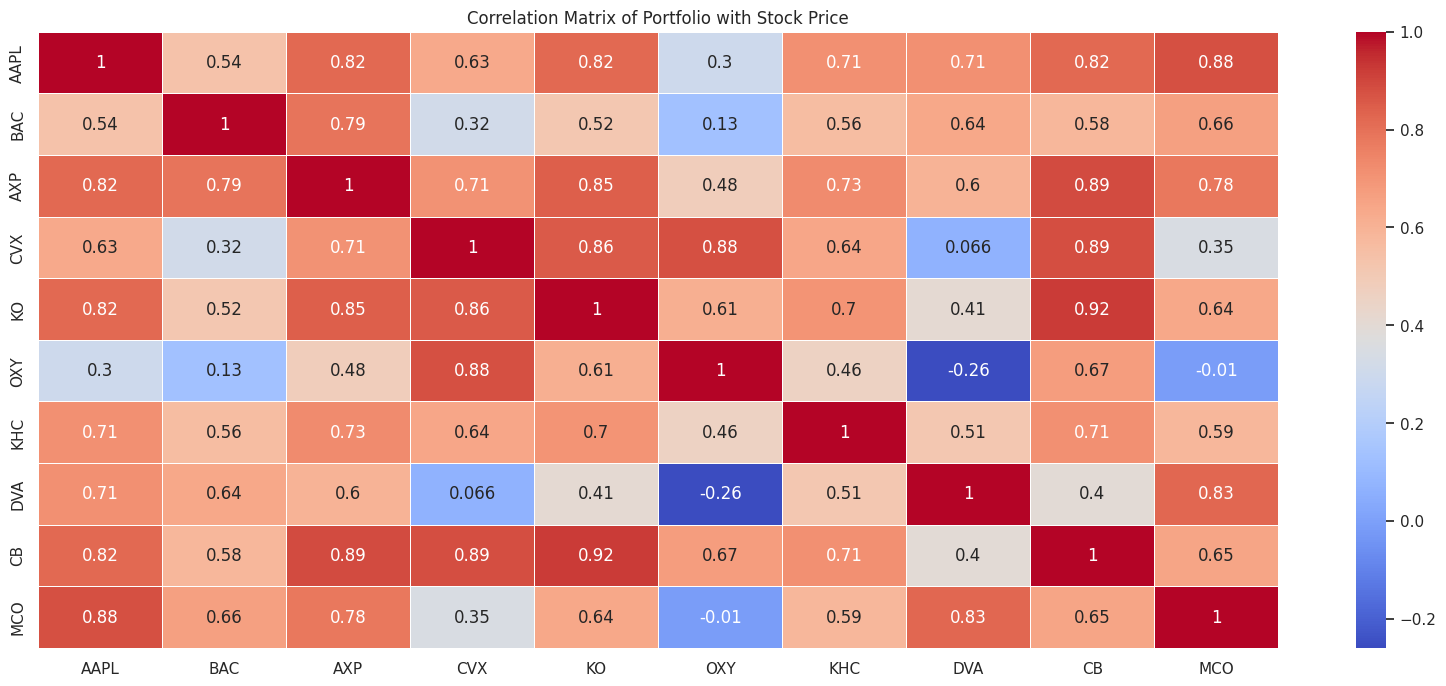

In [ ]:
f# Filter the DataFrame to include only numeric columns
numeric_df_data = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df_data.corr()

# Create a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Portfolio with Stock Price')
plt.show()

## Interpretation of the Correlation based on the Stock Prices



This correlation matrix shows the relationships between the stock prices in this portfolio. High positive correlations (close to 1, shown in dark red) indicate that these stocks move in tandem, such as between AAPL (Apple) and AXP (American Express) or between CB (Chubb) and KO (Coca-Cola). Lower or negative correlations (closer to -1, shown in blue) suggest less synchronized movement, as seen with OXY (Occidental Petroleum) and DVA (DaVita). Diversifying a portfolio with stocks that have lower correlations can help reduce risk, as not all stocks will move in the same direction under market conditions.

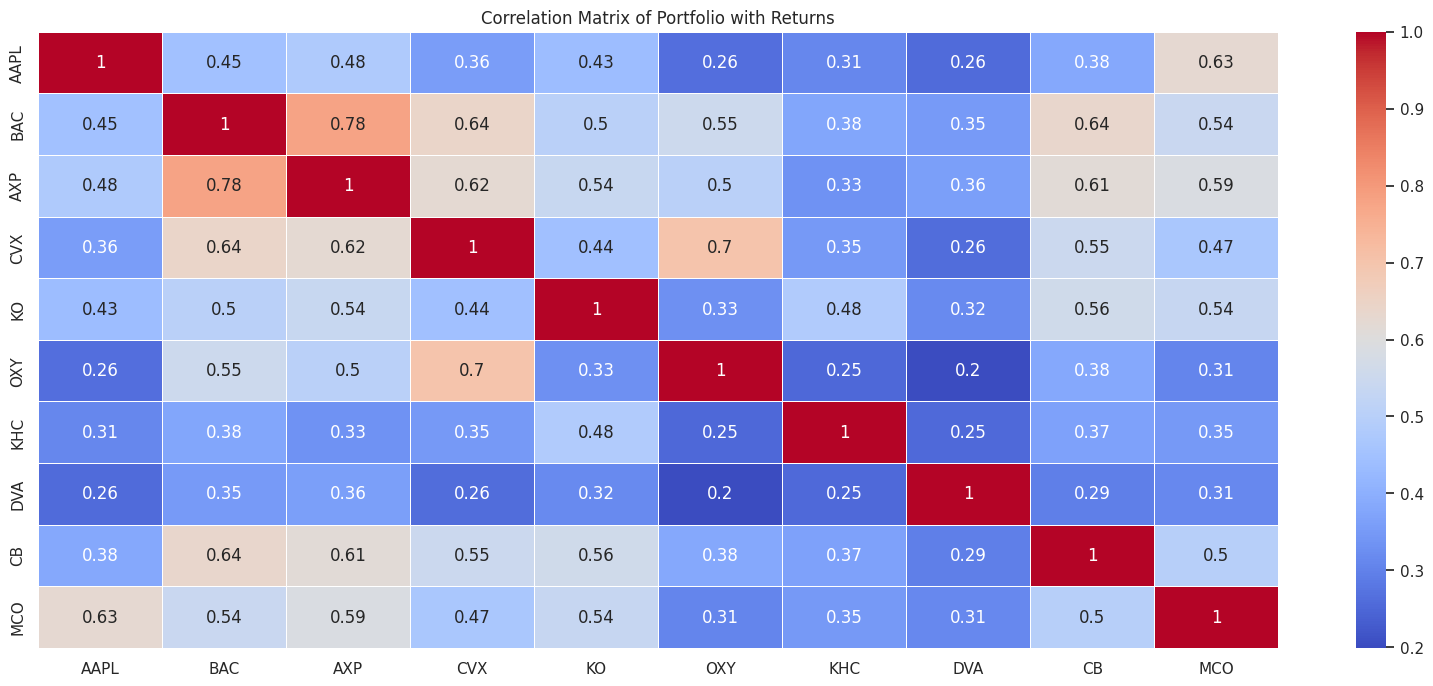

In [ ]:
# Filter the DataFrame to include only numeric columns
numeric_df_data = returns_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df_data.corr()

# Create a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Portfolio with Returns')
plt.show()

## Interpretation of the Correlation based on the Returns


High Positive Correlation: Two stocks have a high positive correlation, they tend to move together. For example, AAPL and MCO have a high positive correlation, they are likely influenced by similar market factors.

Low or Negative Correlation: Stocks with low or negative correlations offer diversification benefits. For instance, BAC (Bank of America) and KO (Coca-Cola) have low or negative correlation, combining them in a portfolio can reduce overall risk.

------

Diversification is key. The purpose is to mix of stocks with low or negative correlations to reduce risk. The correlation matrix helps identify which stocks complement each other in this regard.

# Covariance Matrix

In [ ]:
# here's the covariance matrix
Covariance_matrix = returns_df.cov()

# creating covariance table on stock return dataframe
df_cov = returns_df.cov()

# create the average of each stock
# these are the objective function COEFFICIENTS!
df_return = returns_df.mean()

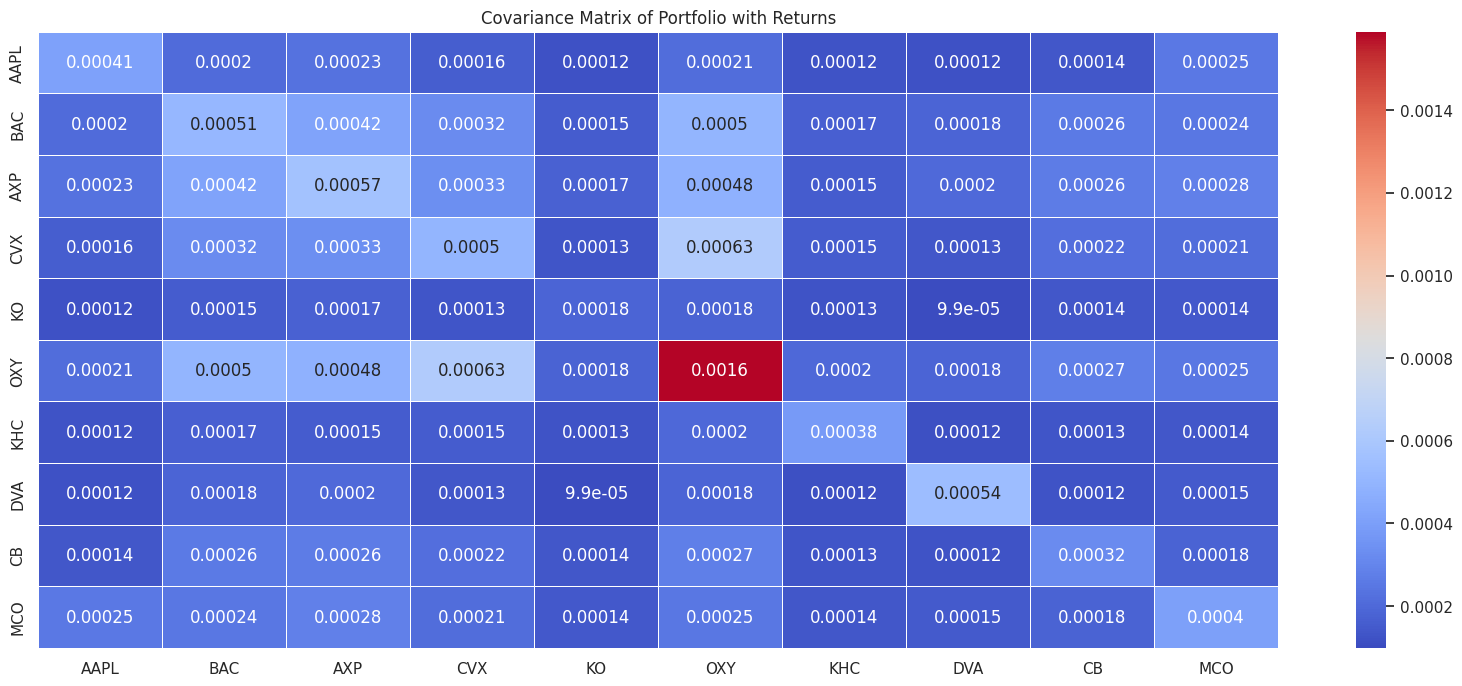

In [ ]:
# Filter the DataFrame to include only numeric columns
numeric_df_data = df.select_dtypes(include=['number'])

# Create a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(df_cov, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Covariance Matrix of Portfolio with Returns')
plt.show()

## Interpretation of the Covariance Matrix based on the Returns


This covariance matrix shows the degree to which the returns of different stocks in a portfolio move together. Higher values (in red) indicate stronger co-movement between stocks, as seen with OXY (Occidental Petroleum) and CVX (Chevron), which likely reflects their common exposure to the energy sector. Lower values (in blue) suggest weaker co-movement, indicating that these stocks behave more independently. This matrix helps in understanding how the combination of different stocks can affect overall portfolio risk, with lower covariance between stocks generally leading to more effective diversification.

In [ ]:
df_return.head(10)

AAPL    0.001500
BAC     0.000588
AXP     0.000870
CVX     0.000664
KO      0.000397
OXY     0.000907
KHC     0.000258
DVA     0.000838
CB      0.000697
MCO     0.001048
dtype: float64

# Model 1 - Maximize

As discussed earlier, our goal is to maximize returns from these stocks. While returns can be calculated on a daily, weekly, or monthly basis, we have opted for daily returns to align with Warren Buffett’s trading activities. For accurate analysis, we will focus exclusively on the Adjusted Close price.

## Decision Variables

In [ ]:
m = ConcreteModel()

In [ ]:
#declare decision variables

m.AAPL = Var(within=NonNegativeReals, bounds=(0,1))
m.BAC = Var(within=NonNegativeReals, bounds=(0,1))
m.AXP = Var(within=NonNegativeReals, bounds=(0,1))
m.CVX = Var(within=NonNegativeReals, bounds=(0,1))
m.KO = Var(within=NonNegativeReals, bounds=(0,1))
m.OXY = Var(within=NonNegativeReals, bounds=(0,1))
m.KHC = Var(within=NonNegativeReals, bounds=(0,1))
m.DVA = Var(within=NonNegativeReals, bounds=(0,1))
m.CB = Var(within=NonNegativeReals, bounds=(0,1))
m.MCO = Var(within=NonNegativeReals, bounds=(0,1))

# you are either investing 0% or you're invest 100%

## Objective Function

In [ ]:
#objective function - maximize
m.objective = Objective(expr = df_return[0]*m.AAPL+
                        df_return[1]*m.BAC+
                        df_return[2]*m.AXP+
                        df_return[3]*m.CVX+
                        df_return[4]*m.KO+
                        df_return[5]*m.OXY+
                        df_return[6]*m.KHC+
                        df_return[7]*m.DVA+
                        df_return[8]*m.CB+
                        df_return[9]*m.MCO,
                        sense=maximize)

<ipython-input-93-48d4cab6bd8c>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m.objective = Objective(expr = df_return[0]*m.AAPL+
<ipython-input-93-48d4cab6bd8c>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_return[1]*m.BAC+
<ipython-input-93-48d4cab6bd8c>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_return[2]*m.AXP+
<ipython-input-93-48d4cab6bd8c>:5: FutureWarning: Series.__getitem__ treating keys as positions is de

## Constraints

In [ ]:
#return
m.return_floor = Constraint(expr = m.objective >= 0.001)

#the stock portfolio should add up to 100
m.sum_proportions = Constraint(expr = m.AAPL + m.BAC + m.AXP + m.CVX + m.KO + m.OXY + m.KHC + m.DVA + m.CB + m.MCO == 1)

#set minimum risk
m.total_risk = Constraint(expr= m.AAPL + m.BAC + m.AXP + m.CVX + m.KO + m.OXY + m.KHC + m.DVA + m.CB + m.MCO >= 0)

**Return Floor:**

- This constraint ensures that the portfolio’s return (represented by m.objective) is at least 0.001 (or 0.1%). It effectively sets a floor for the minimum acceptable return.
- Setting a minimum return floor guarantees that the portfolio will not have a return below a certain threshold. This allows the algorithm find a good allocation for all the 10 stocks in order to generate Mr Warren Buffet a return about 0.1%.

**Sum of Weight Constraints**

- This constraint ensures that the total sum of the weights allocated to all the stocks in the portfolio equals 1 (or 100%). It ensures that the entire capital is allocated across the selected assets without any surplus or deficit.
- The constraint reflects the fundamental principle of portfolio allocation where the sum of the weights must equal 1. This means that all available investment capital is distributed among the selected assets.

**Minimum Risk Constraint**

- This constraint is intended to ensure that the total risk associated with the portfolio is non-negative. However, in the provided form, it seems to be incorrect or incomplete, as it sums up the asset weights instead of addressing the risk or variance.
- The intention behind this constraint is to ensure that the portfolio does not have zero risk, as taking some risk is inherent in investing in the stock market. In practice, an investor must accept a certain level of risk to achieve returns. Through univariate analysis, it was observed that even a risk-averse investor like Warren Buffett accepts a minimal level of risk. Therefore, the algorithm is designed to consider portfolios with a risk level greater than 0%, acknowledging that some degree of risk is necessary to generate returns.



## Risk

In [ ]:
# creating calculations table for calculate the risk
# 3. Calculate risk
def calc_risk(m):
  variables = m.AAPL, m.BAC, m.AXP, m.CVX, m.KO, m.OXY, m.KHC, m.DVA, m.CB, m.MCO
  tickers = ['AAPL', 'BAC', 'AXP', 'CVX', 'KO', 'OXY', 'KHC', 'DVA', 'CB', 'MCO']
  risk_exp = 0
  for i in range(len(variables)):
    for j in range(len(variables)):
      risk_exp += variables[i]*df_cov.at[tickers[i],tickers[j]]*variables[j]
  return risk_exp

# We are going to use this expression to compute the risk
expr_risk = calc_risk(m)

# 3. Max risk
max_risk = 0.03
# Sequence of risk levels
risk_limits = np.arange(0.003, max_risk, 0.0005)
risk_limits

array([0.003 , 0.0035, 0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065,
       0.007 , 0.0075, 0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105,
       0.011 , 0.0115, 0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145,
       0.015 , 0.0155, 0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185,
       0.019 , 0.0195, 0.02  , 0.0205, 0.021 , 0.0215, 0.022 , 0.0225,
       0.023 , 0.0235, 0.024 , 0.0245, 0.025 , 0.0255, 0.026 , 0.0265,
       0.027 , 0.0275, 0.028 , 0.0285, 0.029 , 0.0295])

**Max Risk Selection**

- The maximum risk level of 3% was chosen to align with Warren Buffett’s investment strategy. As previously noted, Buffett is a risk-averse investor, and the univariate analysis shows that all selected stocks have an average risk of 3% or lower. Additionally, setting the maximum risk at 3% ensures that the optimization problem remains feasible; lower risk thresholds led to infeasible solutions with Solver 2.

## Solver Results

### Solver 1

In [ ]:
# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations
returns = {} # key=risk, value = return
for r in risk_limits:
  # WE REMOVE AND RECALCULATE THE RISK IN EACH ITERATION
  m.del_component(m.total_risk)
  # The LHS remains unchanged; we only modify the RHS (risk threshold)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m).write()
  # store our allocation proportions
  param_analysis[r] = [m.AAPL(), m.BAC(), m.AXP(), m.CVX(), m.KO(), m.OXY(), m.KHC(), m.DVA(), m.CB(), m.MCO()]
  # store our returns
  # returns[r] = m.objective()
  returns[r] =  m.AAPL()*df_return[0] + m.BAC()*df_return[1] + m.AXP()*df_return[2] + m.CVX()*df_return[3] + m.KO()*df_return[4] + m.OXY()*df_return[5] + m.KHC()*df_return[6] + m.DVA()*df_return[7] + m.CB()*df_return[8] + m.MCO()*df_return[9]

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.03399777412414551
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


<ipython-input-96-7757f9918bf7>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  returns[r] =  m.AAPL()*df_return[0] + m.BAC()*df_return[1] + m.AXP()*df_return[2] + m.CVX()*df_return[3] + m.KO()*df_return[4] + m.OXY()*df_return[5] + m.KHC()*df_return[6] + m.DVA()*df_return[7] + m.CB()*df_return[8] + m.MCO()*df_return[9]


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.01702570915222168
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ====

### Solver 2

In [ ]:
# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations
returns = {} # key=risk, value = return
for r in risk_limits:
  # Remove constraint to avoid error messages
  m.del_component(m.total_risk)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m)

  # MAY NOT FILTER ALL INFEASIBLE OUTCOMES IN REAL-WORLD INSTANCES
  # # If solution is not feasible, ignore this run
  if result.solver.termination_condition == TerminationCondition.infeasible:
     continue

  # # If solution is not feasible, ignore this run
  # if result.solver.termination_condition != TerminationCondition.optimal:
  #    continue

  result = result.write()

  # store our allocation proportions
  param_analysis[r] = [m.AAPL(), m.BAC(), m.AXP(), m.CVX(), m.KO(), m.OXY(), m.KHC(), m.DVA(), m.CB(), m.MCO()]
  # store our returns
  # returns[r] = m.objective()
  returns[r] =  m.AAPL()*df_return[0] + m.BAC()*df_return[1] + m.AXP()*df_return[2] + m.CVX()*df_return[3] + m.KO()*df_return[4] + m.OXY()*df_return[5] + m.KHC()*df_return[6] + m.DVA()*df_return[7] + m.CB()*df_return[8] + m.MCO()*df_return[9]

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.011388540267944336
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ===

<ipython-input-97-a0bfd662ec4c>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  returns[r] =  m.AAPL()*df_return[0] + m.BAC()*df_return[1] + m.AXP()*df_return[2] + m.CVX()*df_return[3] + m.KO()*df_return[4] + m.OXY()*df_return[5] + m.KHC()*df_return[6] + m.DVA()*df_return[7] + m.CB()*df_return[8] + m.MCO()*df_return[9]


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.014468908309936523
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ===

## Optimal Stock Allocation for Different Risk Levels

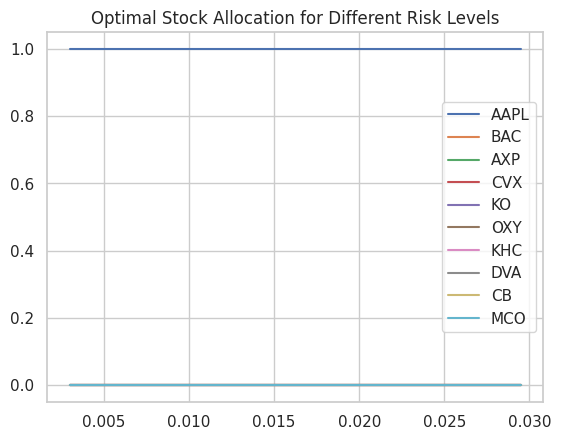

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = ['AAPL', 'BAC', 'AXP', 'CVX', 'KO', 'OXY', 'KHC', 'DVA', 'CB', 'MCO']
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
ax.set_xlabel('Risk Levels')
ax.set_ylabel('Portfolio Weight')
plt.show()

### Analysis of Optimal Stock Allocation for Different Risk Levels


Graph Description

- X-Axis (Risk Levels): This axis represents different risk levels, which can correspond to various target returns or standard deviations of portfolio returns. Moving from left to right indicates increasing levels of risk.

- Y-Axis (Portfolio Weight): This axis represents the proportion of the total portfolio allocated to each stock. Each stock's weight ranges from 0 to 1 (or 0% to 100%).

- Lines (Stock Allocation): Each line represents the allocation of a specific stock in the portfolio across different risk levels. The changes in these lines show how the composition of the portfolio shifts as the risk level changes.

Key Points

- Diversification: The graph shows how the weights of different stocks vary with different risk levels. A diversified portfolio will have multiple stocks with non-zero weights.

- Allocation Trends: The lines indicate trends in stock allocation. For example, some stocks may have increasing weights as risk increases, while others may decrease or remain constant.

- Risk-Return Trade-off: As the risk level changes, the optimal allocation of stocks adjusts to achieve the best possible return for that risk. This adjustment is crucial for maintaining the portfolio on the efficient frontier.

- AAPL (Apple Inc.): If the line for AAPL rises as risk increases, it means Apple becomes a more significant part of the portfolio at higher risk levels.
BAC (Bank of America): If the line for BAC falls as risk increases, it suggests that Bank of America is favored in lower-risk portfolios.
Consistency: Stocks with lines that remain relatively flat across risk levels provide stability in the portfolio, contributing consistently regardless of the risk level.

Risk Management

- For conservative investors, you would focus on the left part of the graph, where lower risk levels are associated with certain stock allocations.

- For aggressive investors, the right part of the graph is more relevant, showing how allocations change to accommodate higher risk.

Portfolio Adjustments

- As risk levels change, reallocating the portfolio according to the trends in the graph ensures that the portfolio remains on the efficient frontier.
The graph helps in dynamically adjusting the portfolio in response to changing market conditions and risk tolerance.

Strategic Decisions

- The information from the graph can guide strategic decisions such as which stocks to increase or decrease in weight when adjusting the portfolio for a new target risk level.
It also highlights which stocks are critical in maintaining an optimal balance of risk and return across different scenarios.


Practical Example

- Suppose the graph shows that AAPL and MCO weights increase with higher risk levels, while KO and BAC weights decrease. This indicates that:

- Higher Risk Portfolios: Apple and Moody’s Corporation are more suitable for higher-risk portfolios aiming for higher returns.

- Lower Risk Portfolios: Coca-Cola and Bank of America are more suitable for lower-risk portfolios aiming for stability and lower volatility.

## Efficient Frontier

In [ ]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward)

[0.003, 0.0035, 0.004, 0.0045000000000000005, 0.005, 0.0055, 0.006, 0.006500000000000001, 0.007, 0.007500000000000001, 0.008, 0.0085, 0.009000000000000001, 0.009500000000000001, 0.01, 0.010499999999999999, 0.011, 0.0115, 0.012, 0.0125, 0.013000000000000001, 0.013500000000000002, 0.013999999999999999, 0.014499999999999999, 0.015, 0.0155, 0.016, 0.0165, 0.017, 0.0175, 0.018, 0.0185, 0.019, 0.0195, 0.02, 0.0205, 0.021, 0.0215, 0.022, 0.0225, 0.023, 0.0235, 0.024, 0.0245, 0.024999999999999998, 0.0255, 0.026, 0.0265, 0.027, 0.0275, 0.028, 0.0285, 0.029, 0.0295]
[0.0015000970540888594, 0.001500097052341225, 0.0015000970511361796, 0.001500097050261702, 0.0015000970495990186, 0.0015000970490806269, 0.0015000970486646597, 0.0015000970483238624, 0.0015000970480397767, 0.0015000970477994798, 0.0015000970475936666, 0.0015000970474154764, 0.0015000970472597414, 0.0015000970471225005, 0.0015000970470006659, 0.0015000970468917857, 0.0015000970467938578, 0.001500097046705374, 0.0015000970466250395, 0.

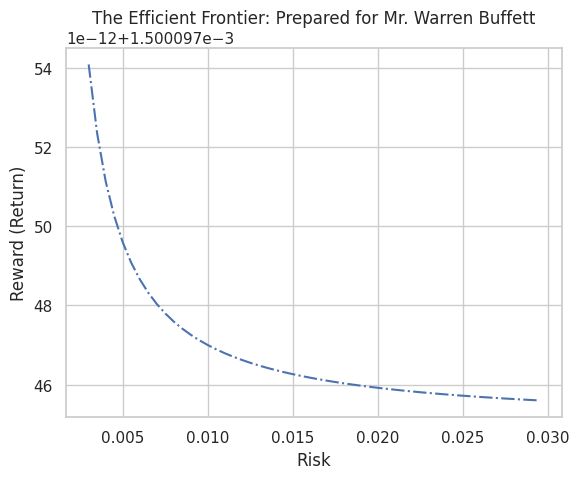

In [ ]:
# plot! pylab makes it easy
from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier: Prepared for Mr. Warren Buffett')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

### Analysis of Efficient Frontier

Risk Tolerance

- If the investor has a low risk tolerance, you would focus on the leftmost part of the curve, selecting portfolios with lower risk and moderate returns.
If the investor is willing to take on more risk for potentially higher returns, you would focus on the right side of the curve.

Portfolio Selection

- Minimum Variance Portfolio: This is the portfolio with the lowest risk. It is suitable for very risk-averse investors.
Maximum Sharpe Ratio Portfolio: This portfolio maximizes the Sharpe ratio, offering the best risk-adjusted return. It is often a good choice for balancing risk and return.

Level of Risk Suggested

- It is suggested that Mr. Warren Buffett takes 0.5% of risk, as it allows him to have the highest level of return at this point.

# Model 2 - Capping Apple's Weight

## Decision Variables

In [ ]:
m = ConcreteModel()

In [ ]:
#declare decision variables

m.AAPL = Var(within=NonNegativeReals, bounds=(0,0.5))
m.BAC = Var(within=NonNegativeReals, bounds=(0.05,1))
m.AXP = Var(within=NonNegativeReals, bounds=(0.03,1))
m.CVX = Var(within=NonNegativeReals, bounds=(0.02,1))
m.KO = Var(within=NonNegativeReals, bounds=(0.01,1))
m.OXY = Var(within=NonNegativeReals, bounds=(0.06,1))
m.KHC = Var(within=NonNegativeReals, bounds=(0.04,1))
m.DVA = Var(within=NonNegativeReals, bounds=(0.06,1))
m.CB = Var(within=NonNegativeReals, bounds=(0.05,1))
m.MCO = Var(within=NonNegativeReals, bounds=(0.02,1))

# you are investing a minimum on each stock, and also capping Apple's maximum to 50%

Creating a different minimum weight on each stock, whilst capping Apple's maximum weight at 50%, in order to create a diversified portfolio.

## Objective Function

In [ ]:
#objective function - maximize
m.objective = Objective(expr = df_return[0]*m.AAPL+
                        df_return[1]*m.BAC+
                        df_return[2]*m.AXP+
                        df_return[3]*m.CVX+
                        df_return[4]*m.KO+
                        df_return[5]*m.OXY+
                        df_return[6]*m.KHC+
                        df_return[7]*m.DVA+
                        df_return[8]*m.CB+
                        df_return[9]*m.MCO,
                        sense=maximize)

<ipython-input-103-48d4cab6bd8c>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m.objective = Objective(expr = df_return[0]*m.AAPL+
<ipython-input-103-48d4cab6bd8c>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_return[1]*m.BAC+
<ipython-input-103-48d4cab6bd8c>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_return[2]*m.AXP+
<ipython-input-103-48d4cab6bd8c>:5: FutureWarning: Series.__getitem__ treating keys as positions i

## Constraints

In [ ]:
#return
m.return_floor = Constraint(expr = m.objective >= 0.01)

#the stock portfolio should add up to 100
m.sum_proportions = Constraint(expr = m.AAPL + m.BAC + m.AXP + m.CVX + m.KO + m.OXY + m.KHC + m.DVA + m.CB + m.MCO == 1)

#set minimum risk
m.total_risk = Constraint(expr= m.AAPL + m.BAC + m.AXP + m.CVX + m.KO + m.OXY + m.KHC + m.DVA + m.CB + m.MCO >= 0)

**Return Floor:**

- This constraint ensures that the portfolio’s return (represented by m.objective) is at least 0.01 (or 1%). It effectively sets a floor for the minimum acceptable return.

- Setting a minimum return floor guarantees that the portfolio will not have a return below a certain threshold. This allows the algorithm find a good allocation for all the 10 stocks in order to generate Mr Warren Buffet a return about 1%.

**Sum of Weight Constraints**

- This constraint ensures that the total sum of the weights allocated to all the stocks in the portfolio equals 1 (or 100%). It ensures that the entire capital is allocated across the selected assets without any surplus or deficit.

- The constraint reflects the fundamental principle of portfolio allocation where the sum of the weights must equal 1. This means that all available investment capital is distributed among the selected assets.

**Minimum Risk Constraint**

- This constraint is intended to ensure that the total risk associated with the portfolio is non-negative. However, in the provided form, it seems to be incorrect or incomplete, as it sums up the asset weights instead of addressing the risk or variance.

- The intention behind this constraint is to ensure that the portfolio does not have zero risk, as taking some risk is inherent in investing in the stock market. In practice, an investor must accept a certain level of risk to achieve returns. Through univariate analysis, it was observed that even a risk-averse investor like Warren Buffett accepts a minimal level of risk. Therefore, the algorithm is designed to consider portfolios with a risk level greater than 0%, acknowledging that some degree of risk is necessary to generate returns.

## Risk

In [ ]:
# creating calculations table for calculate the risk
# 3. Calculate risk
def calc_risk(m):
  variables = m.AAPL, m.BAC, m.AXP, m.CVX, m.KO, m.OXY, m.KHC, m.DVA, m.CB, m.MCO
  tickers = ['AAPL', 'BAC', 'AXP', 'CVX', 'KO', 'OXY', 'KHC', 'DVA', 'CB', 'MCO']
  risk_exp = 0
  for i in range(len(variables)):
    for j in range(len(variables)):
      risk_exp += variables[i]*df_cov.at[tickers[i],tickers[j]]*variables[j]
  return risk_exp

# We are going to use this expression to compute the risk
expr_risk = calc_risk(m)

# 3. Max risk
max_risk = 0.03
# Sequence of risk levels
risk_limits = np.arange(0.003, max_risk, 0.0005)
risk_limits

array([0.003 , 0.0035, 0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065,
       0.007 , 0.0075, 0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105,
       0.011 , 0.0115, 0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145,
       0.015 , 0.0155, 0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185,
       0.019 , 0.0195, 0.02  , 0.0205, 0.021 , 0.0215, 0.022 , 0.0225,
       0.023 , 0.0235, 0.024 , 0.0245, 0.025 , 0.0255, 0.026 , 0.0265,
       0.027 , 0.0275, 0.028 , 0.0285, 0.029 , 0.0295])

**Max Risk Selection**

- The maximum risk level of 3% was chosen to align with Warren Buffett’s investment strategy. As previously noted, Buffett is a risk-averse investor, and the univariate analysis shows that all selected stocks have an average risk of 3% or lower. Additionally, setting the maximum risk at 3% ensures that the optimization problem remains feasible; lower risk thresholds led to infeasible solutions with Solver 2.

## Solver Results

### Solver 1

In [ ]:
# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations
returns = {} # key=risk, value = return
for r in risk_limits:
  # WE REMOVE AND RECALCULATE THE RISK IN EACH ITERATION
  m.del_component(m.total_risk)
  # The LHS remains unchanged; we only modify the RHS (risk threshold)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m).write()
  # store our allocation proportions
  param_analysis[r] = [m.AAPL(), m.BAC(), m.AXP(), m.CVX(), m.KO(), m.OXY(), m.KHC(), m.DVA(), m.CB(), m.MCO()]
  # store our returns
  # returns[r] = m.objective()
  returns[r] =  m.AAPL()*df_return[0] + m.BAC()*df_return[1] + m.AXP()*df_return[2] + m.CVX()*df_return[3] + m.KO()*df_return[4] + m.OXY()*df_return[5] + m.KHC()*df_return[6] + m.DVA()*df_return[7] + m.CB()*df_return[8] + m.MCO()*df_return[9]

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.016619205474853516
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

<ipython-input-106-7757f9918bf7>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  returns[r] =  m.AAPL()*df_return[0] + m.BAC()*df_return[1] + m.AXP()*df_return[2] + m.CVX()*df_return[3] + m.KO()*df_return[4] + m.OXY()*df_return[5] + m.KHC()*df_return[6] + m.DVA()*df_return[7] + m.CB()*df_return[8] + m.MCO()*df_return[9]
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.021431922912597656
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.017857074737548828
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.016282081604003906
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.016420841217041016
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.016572952270507812
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.020928144454956055
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.016663074493408203
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.016683578491210938
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.016219377517700195
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.018019676208496094
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.01664113998413086
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.016293764114379883
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.014380693435668945
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.014957904815673828
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.015308856964111328
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.017961502075195312
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.022766590118408203
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.017824172973632812
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.017589330673217773
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.01943516731262207
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.01735687255859375
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.017845869064331055
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.01971912384033203
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.02526998519897461
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.04509925842285156
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.027284622192382812
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.028789043426513672
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03346848487854004
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.030286550521850586
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.030710458755493164
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.02959895133972168
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.0378110408782959
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03239893913269043
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.038056135177612305
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.045191287994384766
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.054044485092163086
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.028192758560180664
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.04244661331176758
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.039780616760253906
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.025274276733398438
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03560829162597656
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03391885757446289
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.045487403869628906
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.0411534309387207
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.04227638244628906
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.05440187454223633
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.04965329170227051
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03932929039001465
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.04688882827758789
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.0758504867553711
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.08843111991882324
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.08079028129577637
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.15765619277954102
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

### Solver 2

In [ ]:
# Commented out since the result says problem may be infeasible
# # updating risk contraint for each limit and then solving the problem
# param_analysis = {} # key=risk, value =stock allocations
# returns = {} # key=risk, value = return
# for r in risk_limits:
#   # Remove constraint to avoid error messages
#   m.del_component(m.total_risk)
#   m.total_risk = Constraint(expr = expr_risk <= r)
#   # run solver
#   result = SolverFactory('ipopt', executable=ipopt_executable).solve(m)

#   # MAY NOT FILTER ALL INFEASIBLE OUTCOMES IN REAL-WORLD INSTANCES
#   # # If solution is not feasible, ignore this run
#   if result.solver.termination_condition == TerminationCondition.infeasible:
#      continue

#   # # If solution is not feasible, ignore this run
#   # if result.solver.termination_condition != TerminationCondition.optimal:
#   #    continue

#   result = result.write()

#   # store our allocation proportions
#   param_analysis[r] = [m.AAPL(), m.BAC(), m.AXP(), m.CVX(), m.KO(), m.OXY(), m.KHC(), m.DVA(), m.CB(), m.MCO()]
#   # store our returns
#   # returns[r] = m.objective()
#   returns[r] =  m.AAPL()*df_return[0] + m.BAC()*df_return[1] + m.AXP()*df_return[2] + m.CVX()*df_return[3] + m.KO()*df_return[4] + m.OXY()*df_return[5] + m.KHC()*df_return[6] + m.DVA()*df_return[7] + m.CB()*df_return[8] + m.MCO()*df_return[9]

## Optimal Stock Allocation for Different Risk Levels

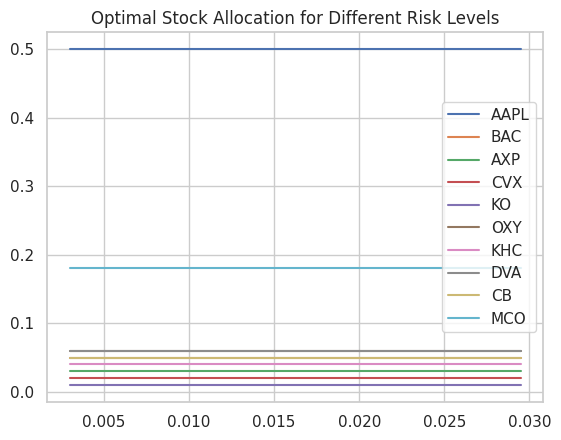

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = ['AAPL', 'BAC', 'AXP', 'CVX', 'KO', 'OXY', 'KHC', 'DVA', 'CB', 'MCO']
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
ax.set_xlabel('Risk Levels')
ax.set_ylabel('Portfolio Weight')
plt.show()

### Analysis of Optimal Stock Allocation for Different Risk Levels

- The graph suggests to invest 50% of the portfolio in Apple, and less than 20% in MCO, while the remaining 30% amongst the remaining 8 stocks.

- This output is generated due to the forced bounds which cause the portfolio to be diversified.

- This is extremely beneficial, as earlier identified, there is low correlation between the stocks in the portfolio suggesting that a diversified portfolio will result in lower risk.

## Efficient Frontier

In [ ]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward)

[0.003, 0.0035, 0.004, 0.0045000000000000005, 0.005, 0.0055, 0.006, 0.006500000000000001, 0.007, 0.007500000000000001, 0.008, 0.0085, 0.009000000000000001, 0.009500000000000001, 0.01, 0.010499999999999999, 0.011, 0.0115, 0.012, 0.0125, 0.013000000000000001, 0.013500000000000002, 0.013999999999999999, 0.014499999999999999, 0.015, 0.0155, 0.016, 0.0165, 0.017, 0.0175, 0.018, 0.0185, 0.019, 0.0195, 0.02, 0.0205, 0.021, 0.0215, 0.022, 0.0225, 0.023, 0.0235, 0.024, 0.0245, 0.024999999999999998, 0.0255, 0.026, 0.0265, 0.027, 0.0275, 0.028, 0.0285, 0.029, 0.0295]
[0.0011613028428480972, 0.0011613028428481018, 0.0011613028428481015, 0.0011613028428481015, 0.0011613028428481015, 0.0011613028428481015, 0.0011613028428481015, 0.0011613028428481018, 0.0011613028428481018, 0.0011613028428481018, 0.0011613028428481015, 0.0011613028428481018, 0.0011613028428481018, 0.0011613028428481018, 0.0011613028428481018, 0.0011613028428481018, 0.0011613028428481018, 0.0011613028428481018, 0.0011613028428481022,

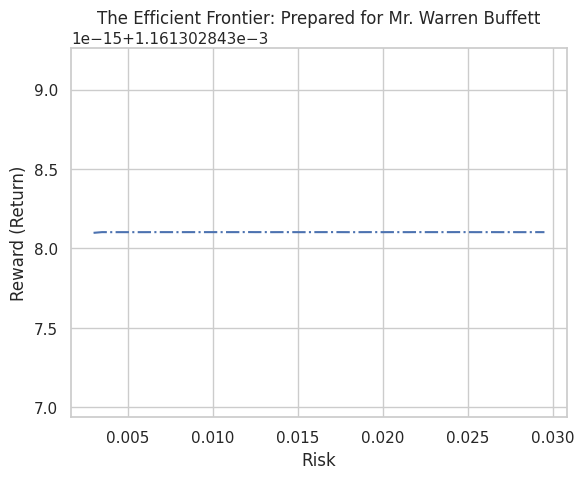

In [ ]:
# plot! pylab makes it easy
from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier: Prepared for Mr. Warren Buffett')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

### Analysis of Efficient Frontier

Best to take risk lower than 0.5%, as the return remains the same no matter the change in risk.

This could be contributted to the same portfolio allocation through different risk levels.

# Final Recommendations for Mr. Warren Buffett

- Based on the results from Model 1 and Model 2, the algorithm consistently recommends investing in Apple, even when constrained by a specified percentage of the total investment. This recommendation persists because Apple has historically demonstrated strong performance with high returns and low risk compared to the other stocks. The algorithm’s objective is to optimize returns while minimizing risk, and Apple’s historical data supports its superior performance in both areas.

- Based on the portfolio allocation of Berkshire Hathaway, Apple represents the largest share, accounting for 47% of the portfolio. This indicates that Buffett's strategy of focusing on long-term investments rather than reacting to short-term market fluctuations has been highly successful. This substantial allocation reflects confidence in Apple's sustained performance and aligns with Buffett's patient investment approach.

---

- Given these results, diversifying his portfolio more extensively, could help him achieve better risk mitigation. A more diversified portfolio helps to buffer against short-term market fluctuations, as the different stocks can hedge against each other, leading to a more stable and resilient investment strategy.

---

- Mr. Buffett’s current portfolio shows that three major companies hold the largest shares, while the remaining seven companies each constitute only 1-9% of the portfolio. We recommend that Buffett consider increasing his investment in these smaller positions. We believe that these companies, and their respective industries, are poised for future growth. By increasing allocations to these promising sectors, Berkshire Hathaway could capitalize on potential gains and further enhance the portfolio’s diversification.

---
